In [2]:
from elliot.run import run_experiment
import zipfile
import io
import requests
import os
import pandas as pd
import numpy as np

import pandas as pd
pd.options.display.max_rows = 100
import numpy as np
import os
from lenskit import crossfold as xf
from data_generation import generate_data
from itertools import chain
from lenskit import util, batch, topn
import modelling_mf

In [3]:
data="fairbook"
# user-item interactions
fairbook_ratings = pd.read_csv("elliot/data/fairbook/"+data+"_events.csv")

user_col = "user" # the name of the column that includes the users
item_col = "item" # the name of the column that includes the items
predict_col="rating" # the name of the column that includes the interaction

#### Popularity Bad

In [29]:
data_strategies = ['popularity_bad',
                   ]
location = 'elliot/results/popularity_bad'
# possible values for the hyperparameters
mlp_values = ['64-32', '64-64']
batch_size_values = [256, 512]
mlp = mlp_values[0]
batch_size = batch_size_values[1]


elliot/results/popularity_bad1/recs/
elliot/results/popularity_bad1/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-32_imlp=64-32_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 11:57:28.216681: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:57:28.216724: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:57:28.424987: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:57:28.425022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:57:28.679109: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 2447
1.92374213836478


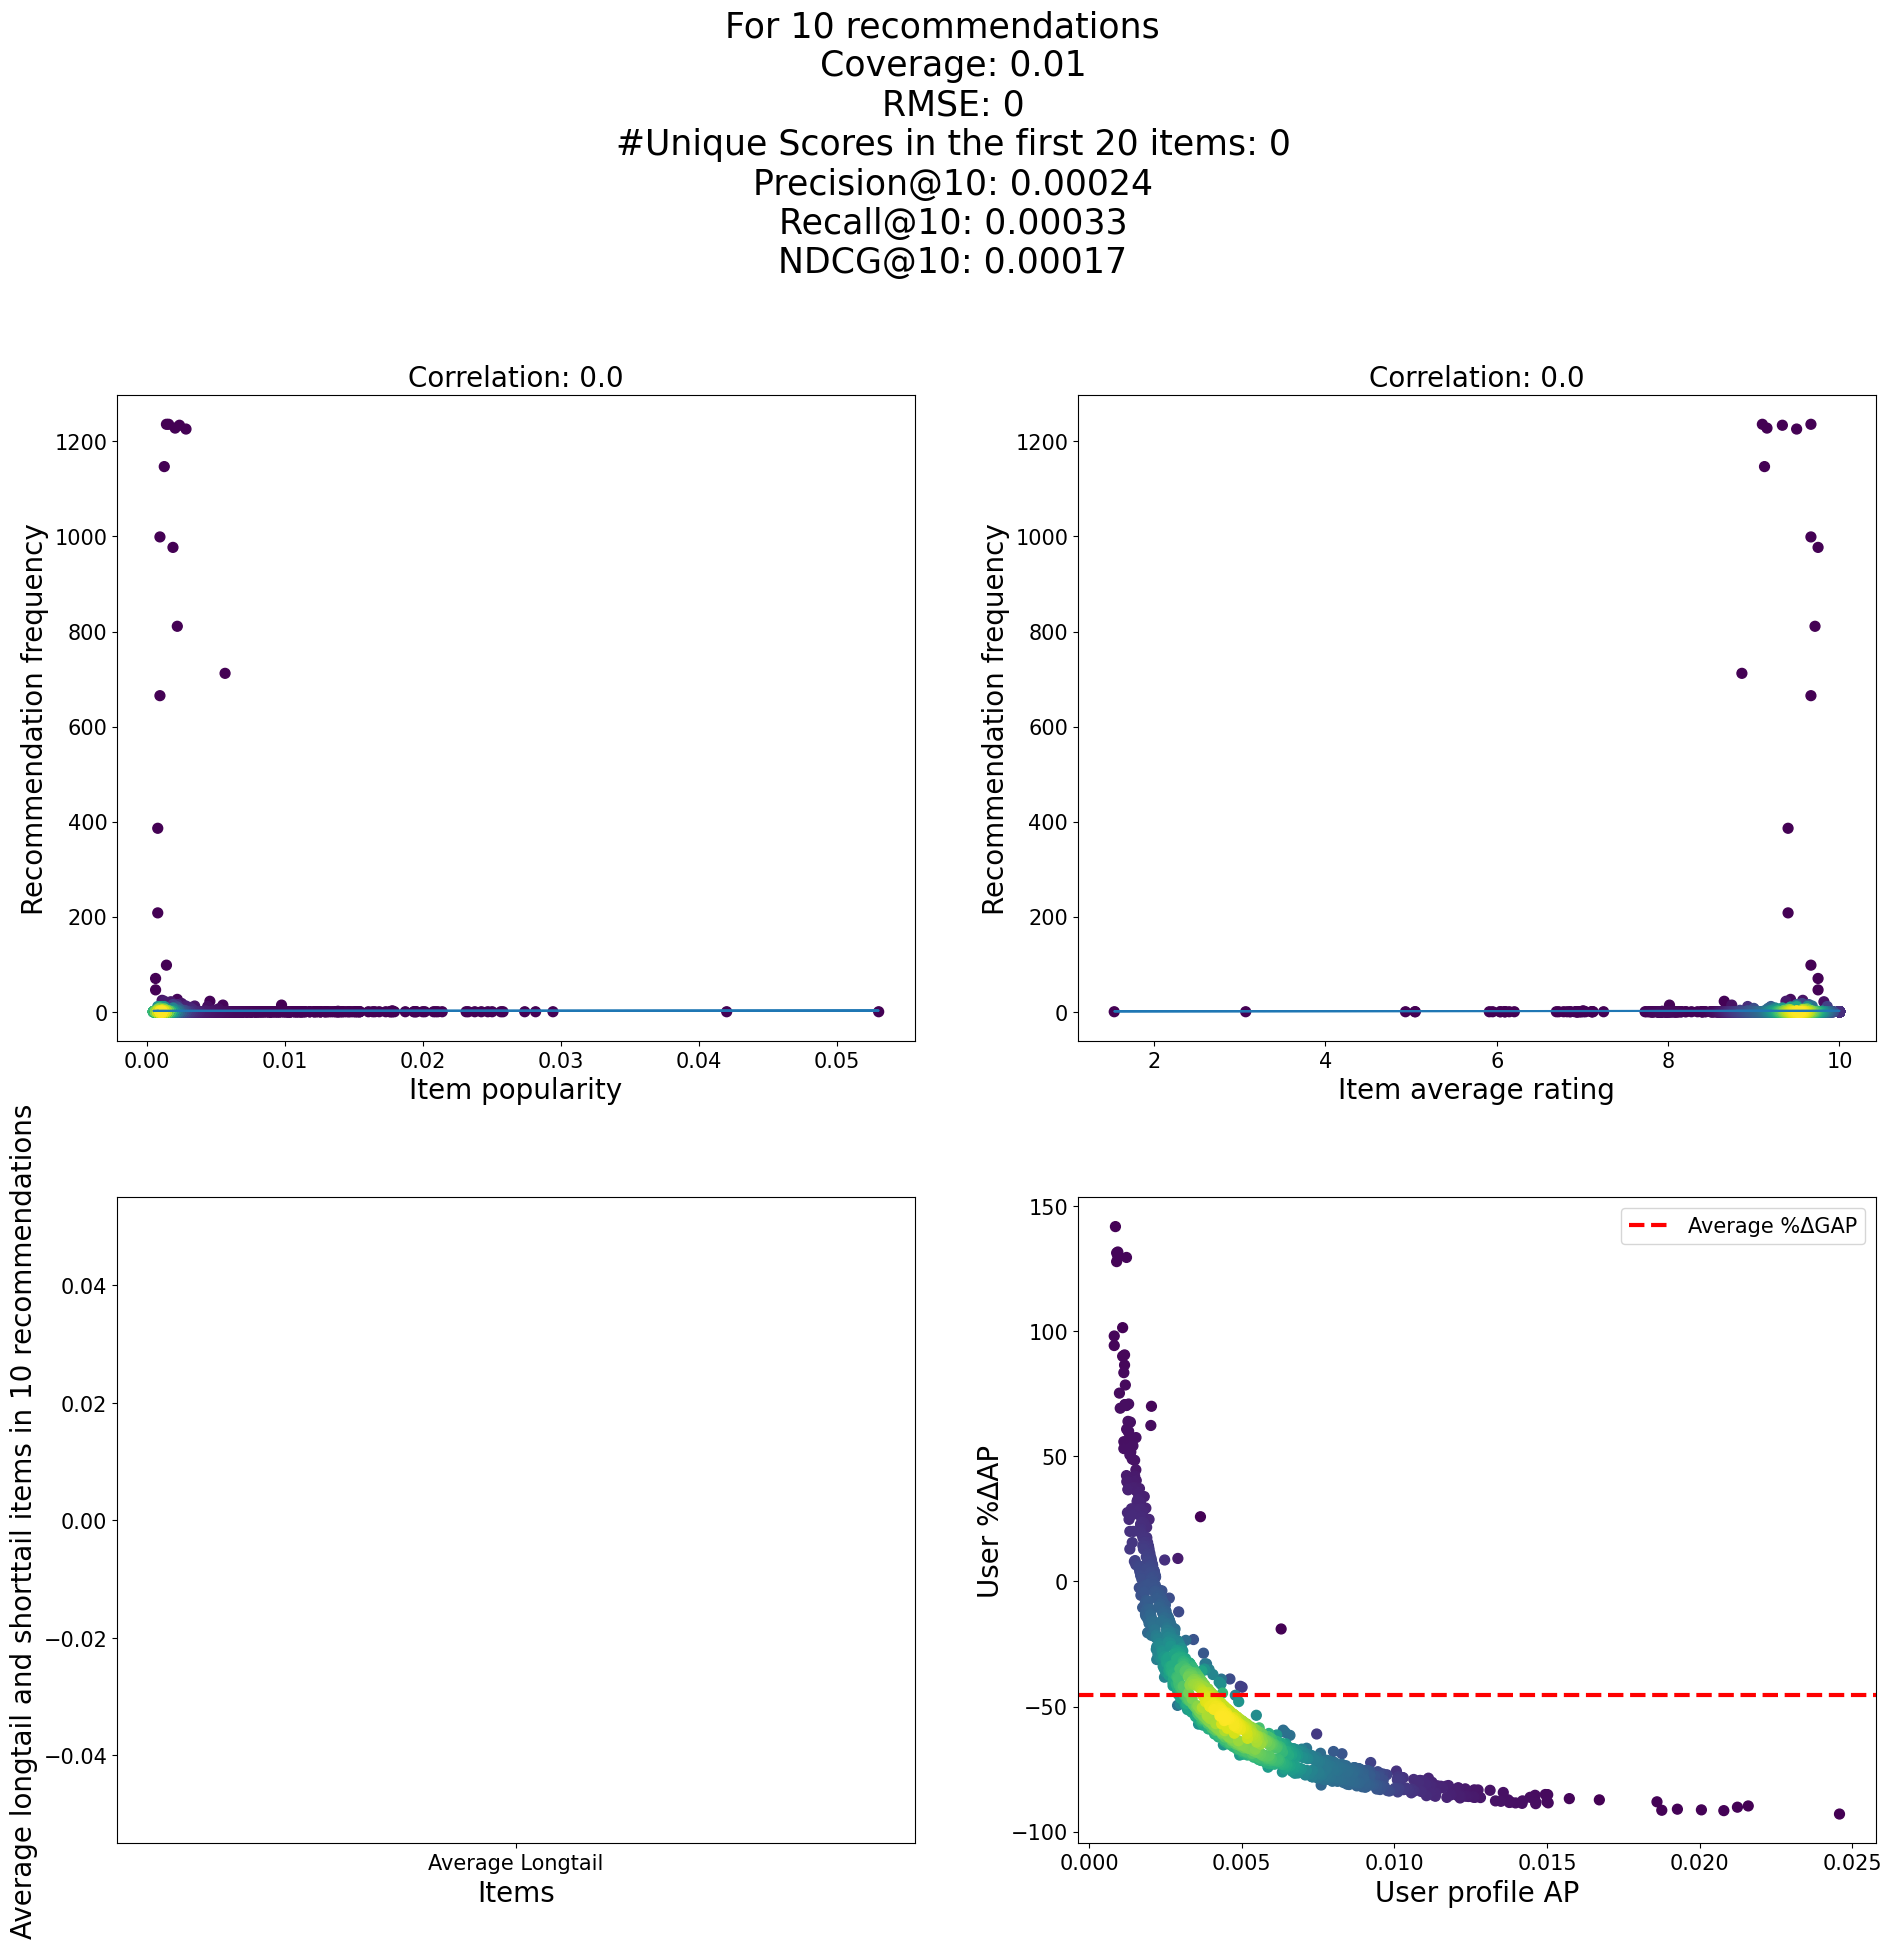

elliot/results/popularity_bad2/recs/
elliot/results/popularity_bad2/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-32_imlp=64-32_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 11:57:39.349967: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:57:39.350010: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:57:39.568212: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:57:39.568255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:57:39.747324: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 808
0.6352201257861635


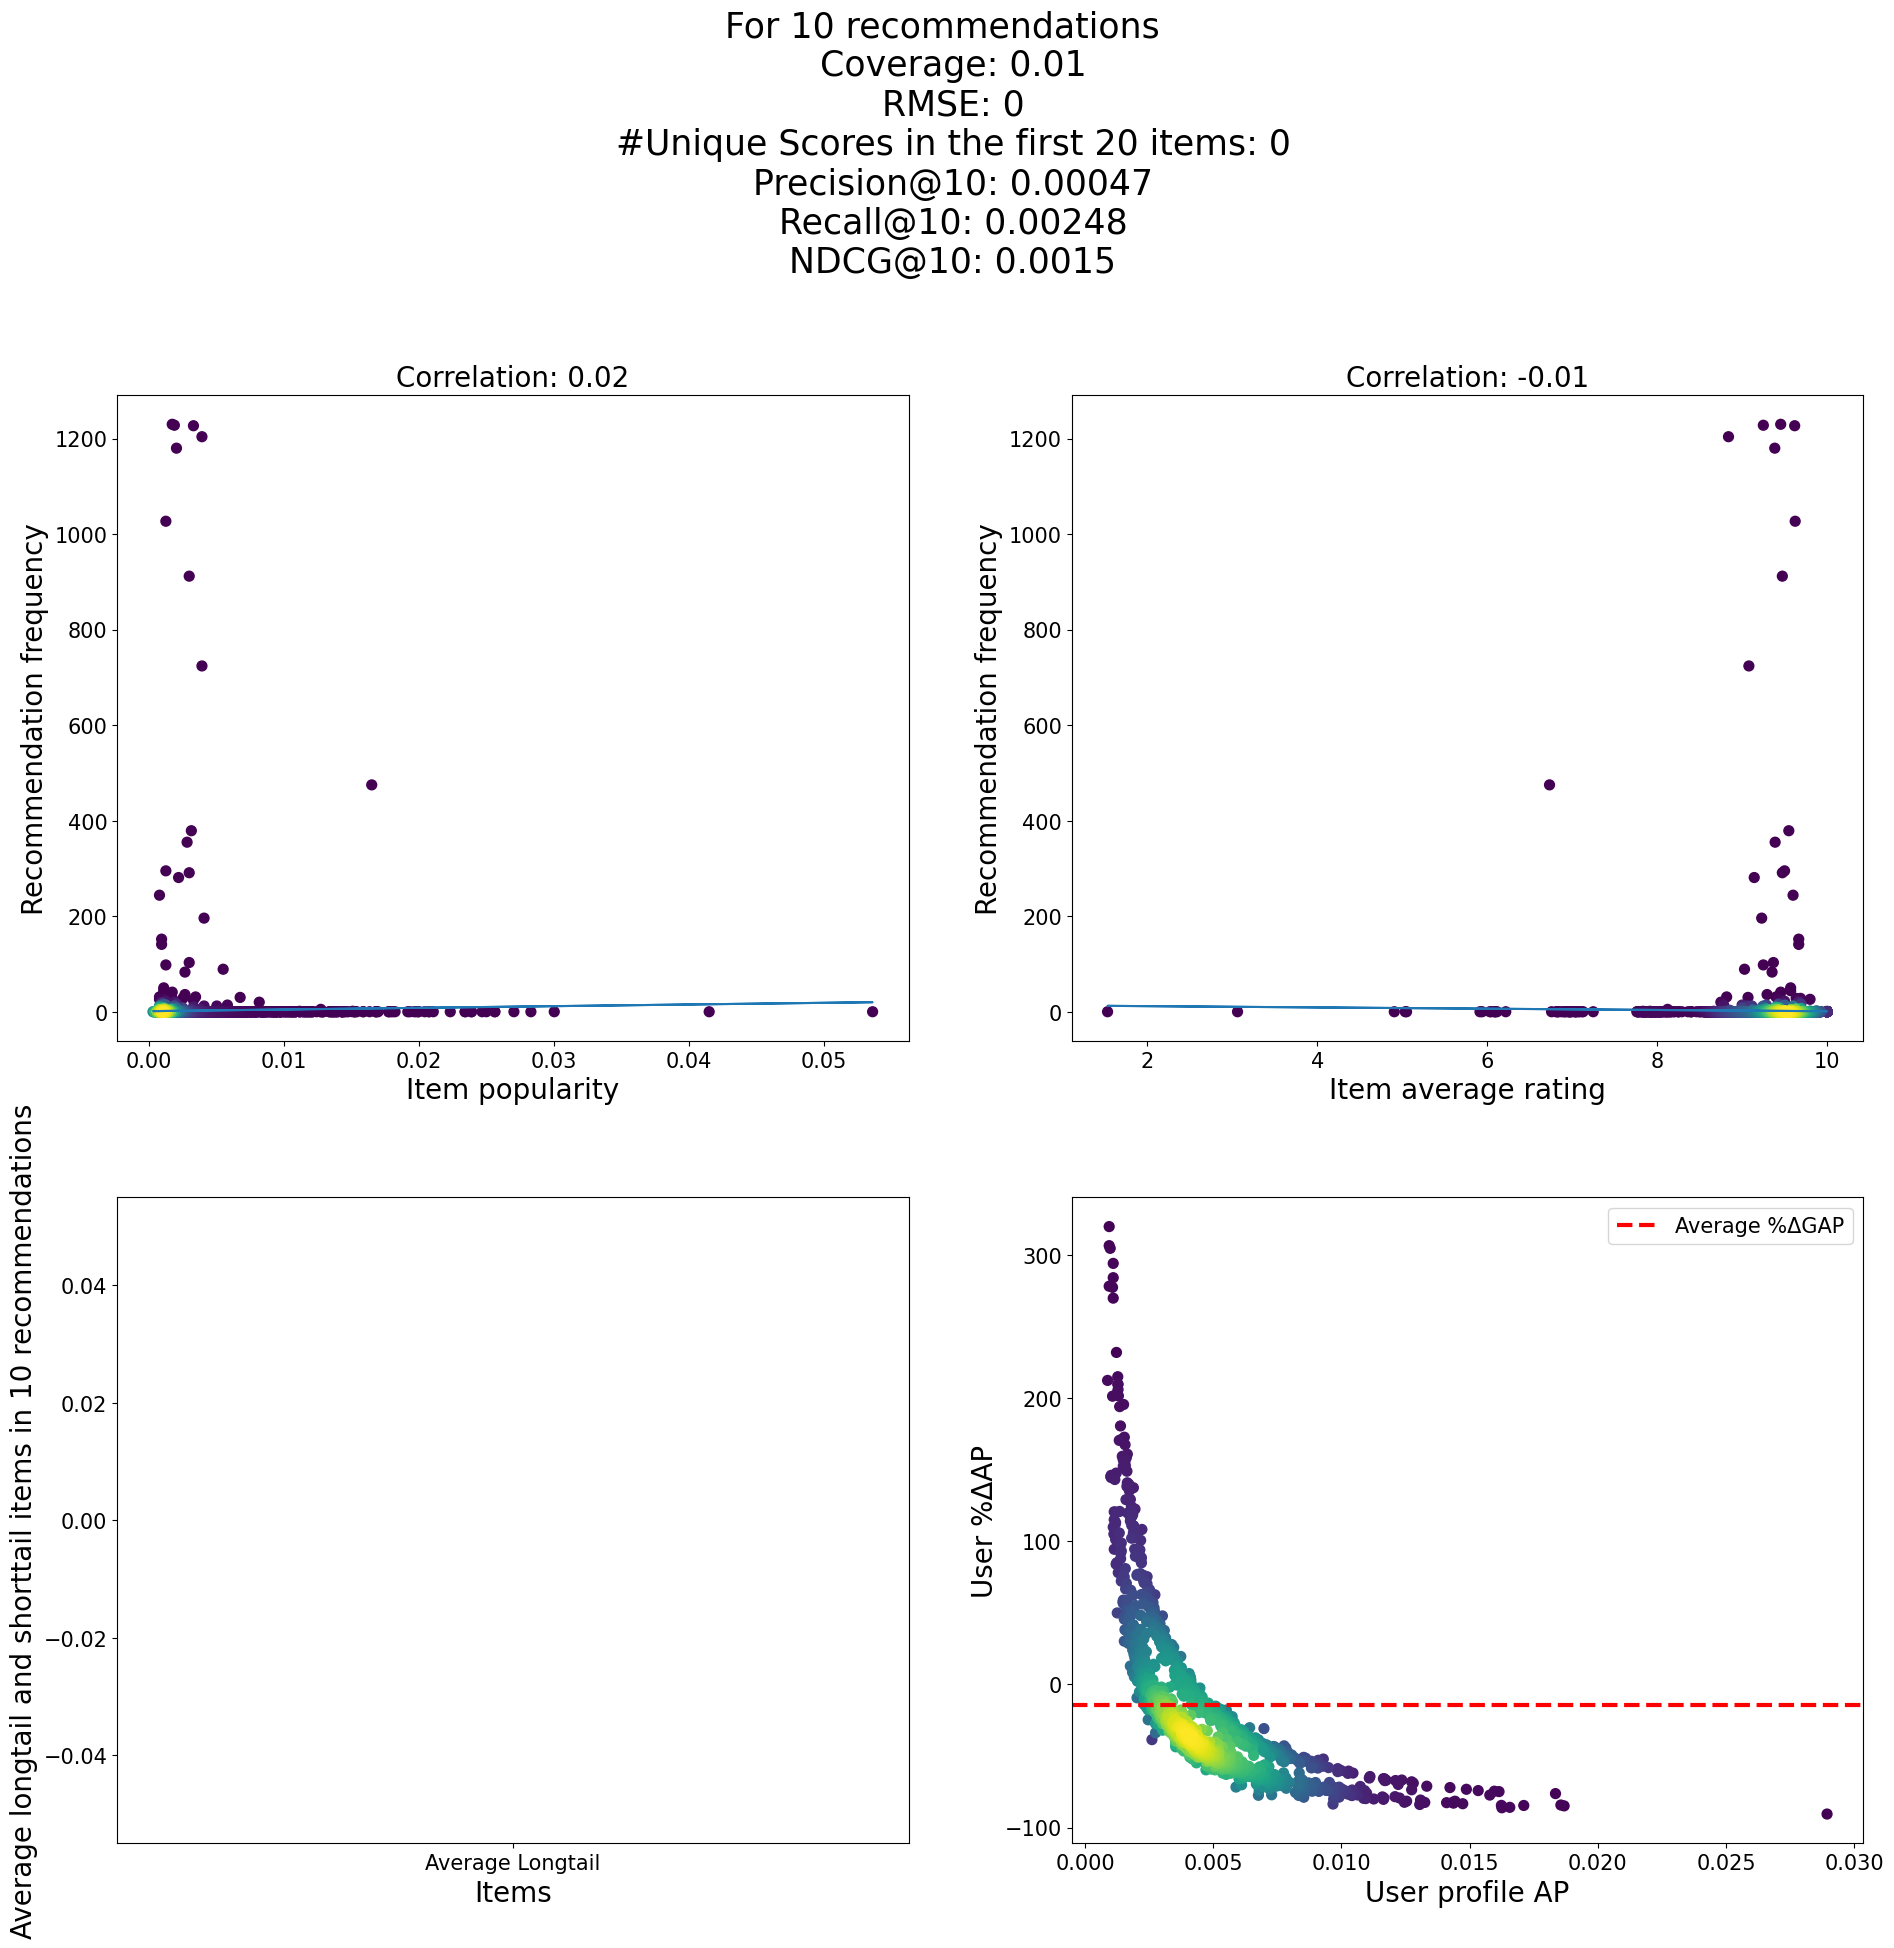

elliot/results/popularity_bad3/recs/
elliot/results/popularity_bad3/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-32_imlp=64-32_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 11:57:50.438624: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:57:50.438666: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:57:50.641064: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:57:50.641102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:57:50.879043: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 2975
2.3388364779874213


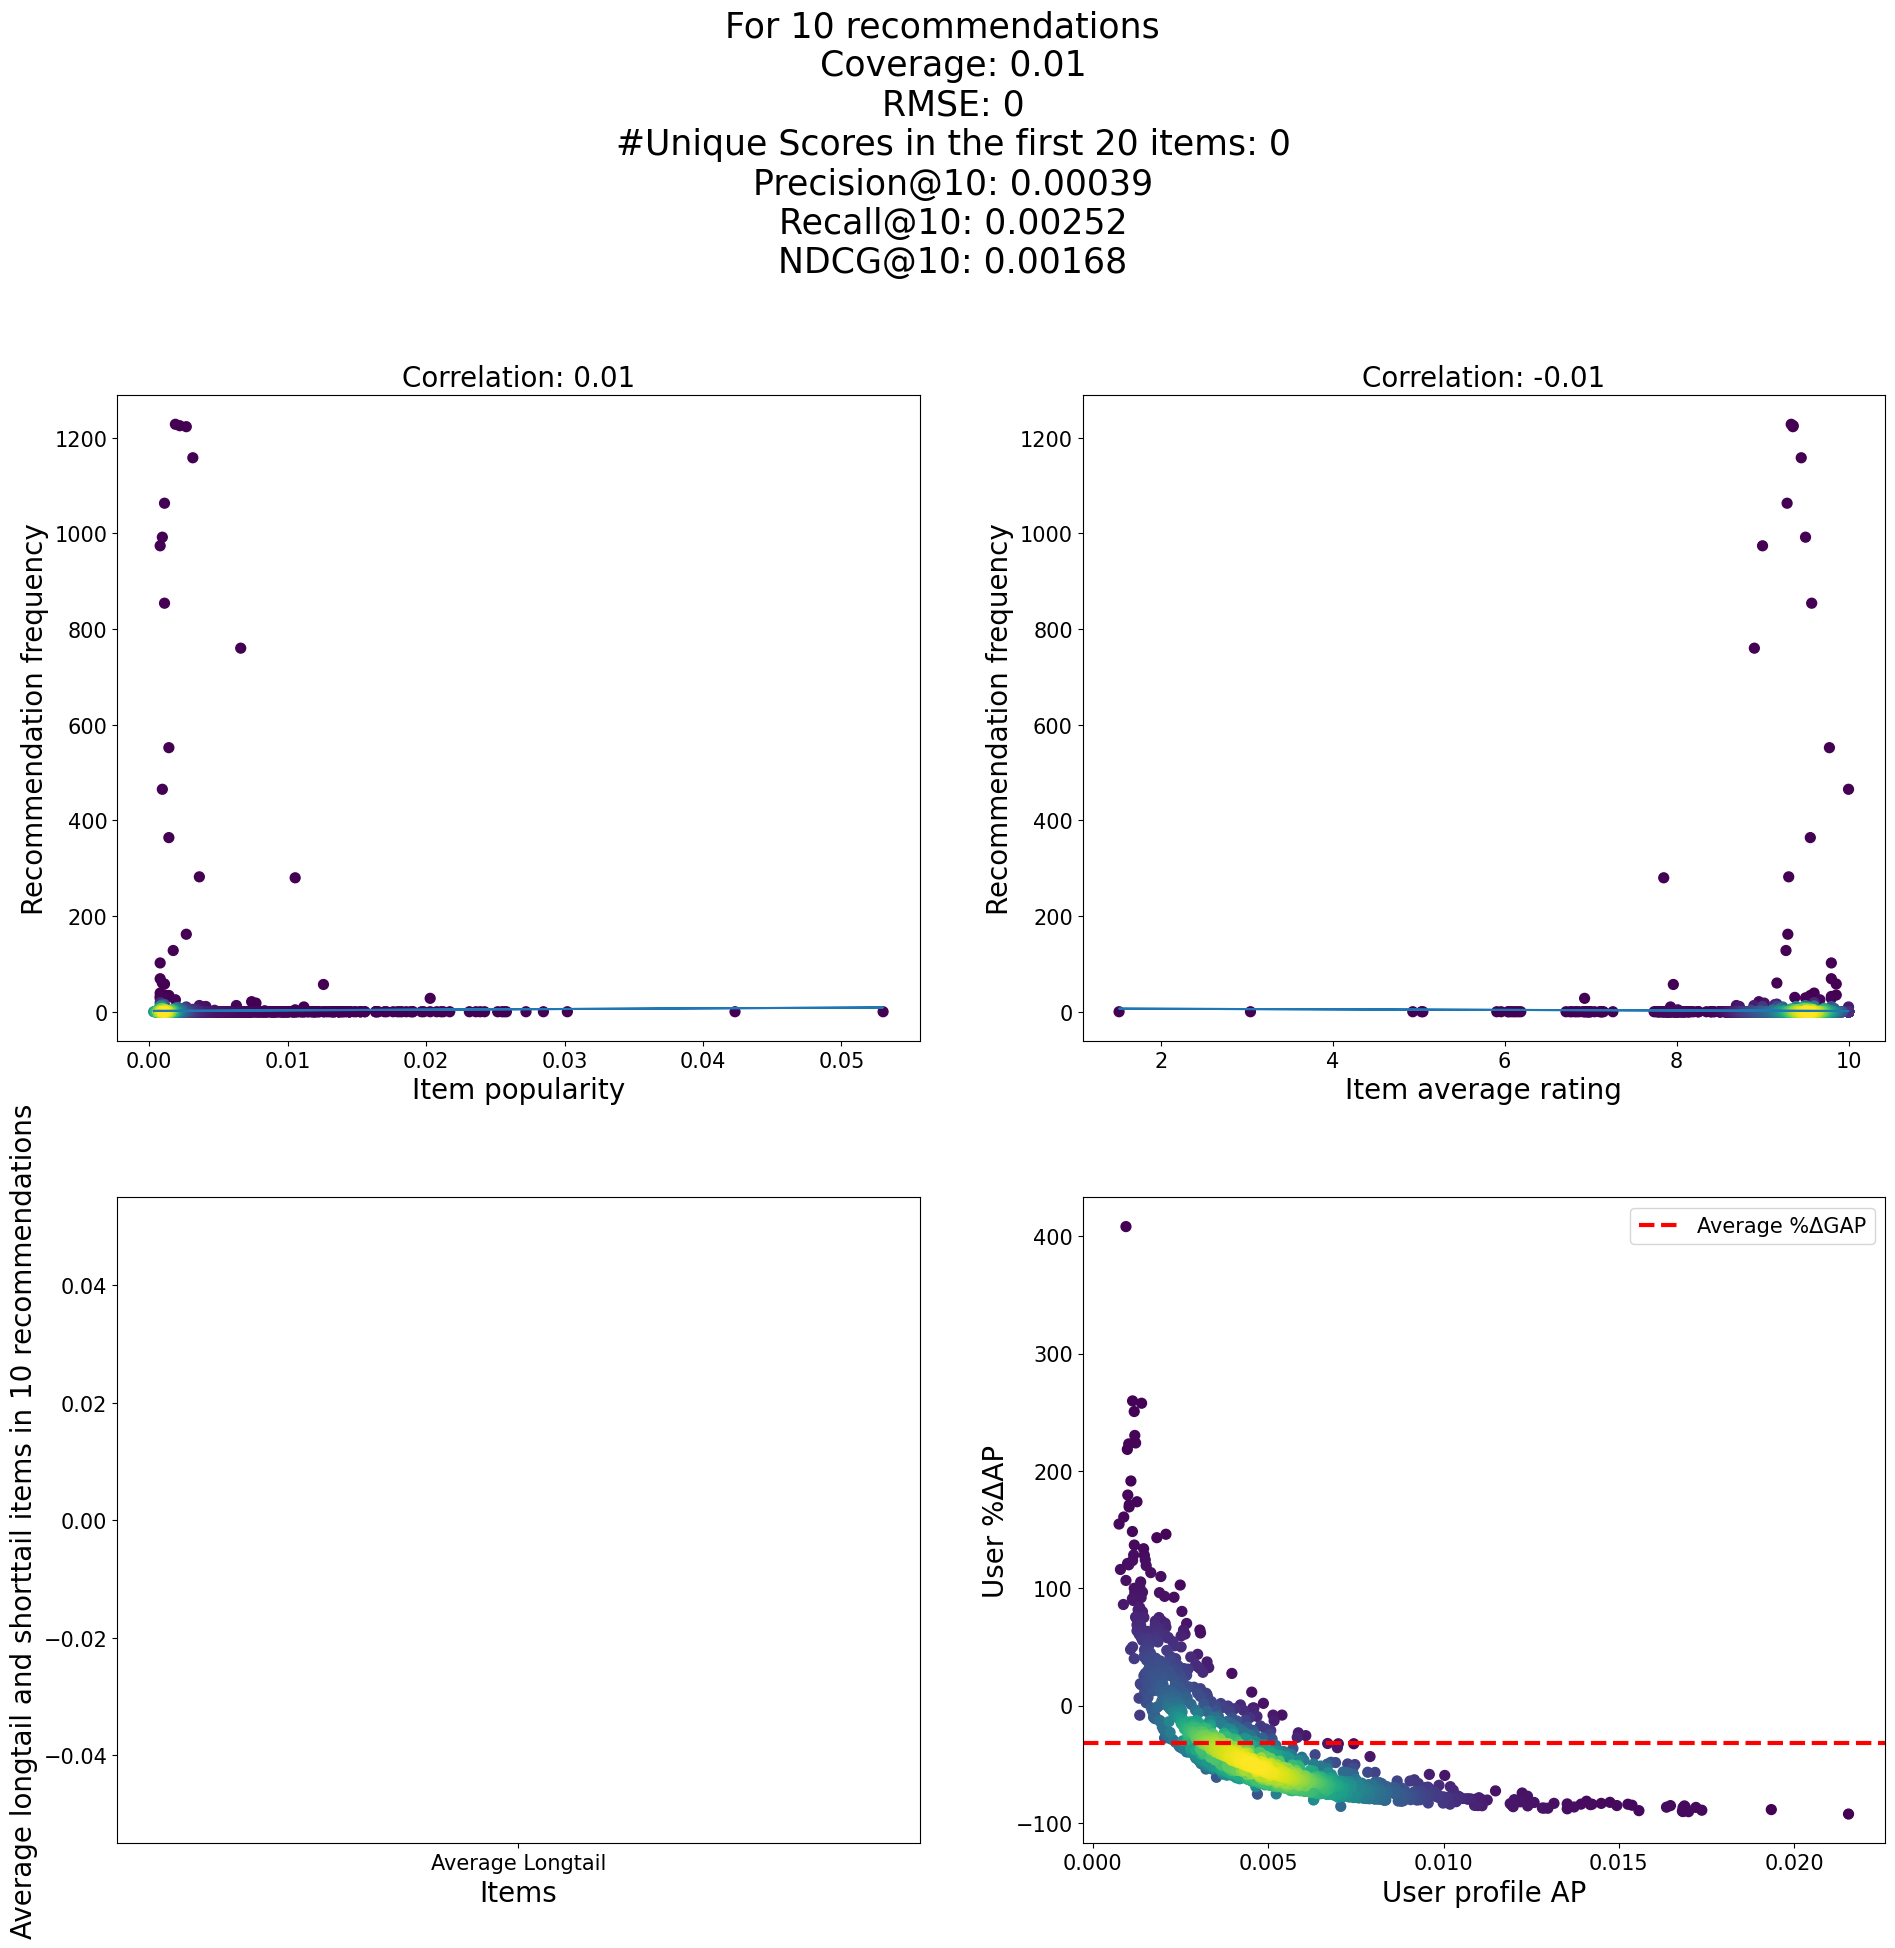

elliot/results/popularity_bad4/recs/
elliot/results/popularity_bad4/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-32_imlp=64-32_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 11:58:01.806307: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:58:01.806348: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:58:01.986566: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:58:01.986603: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:58:02.217647: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 7506
5.90558615263572


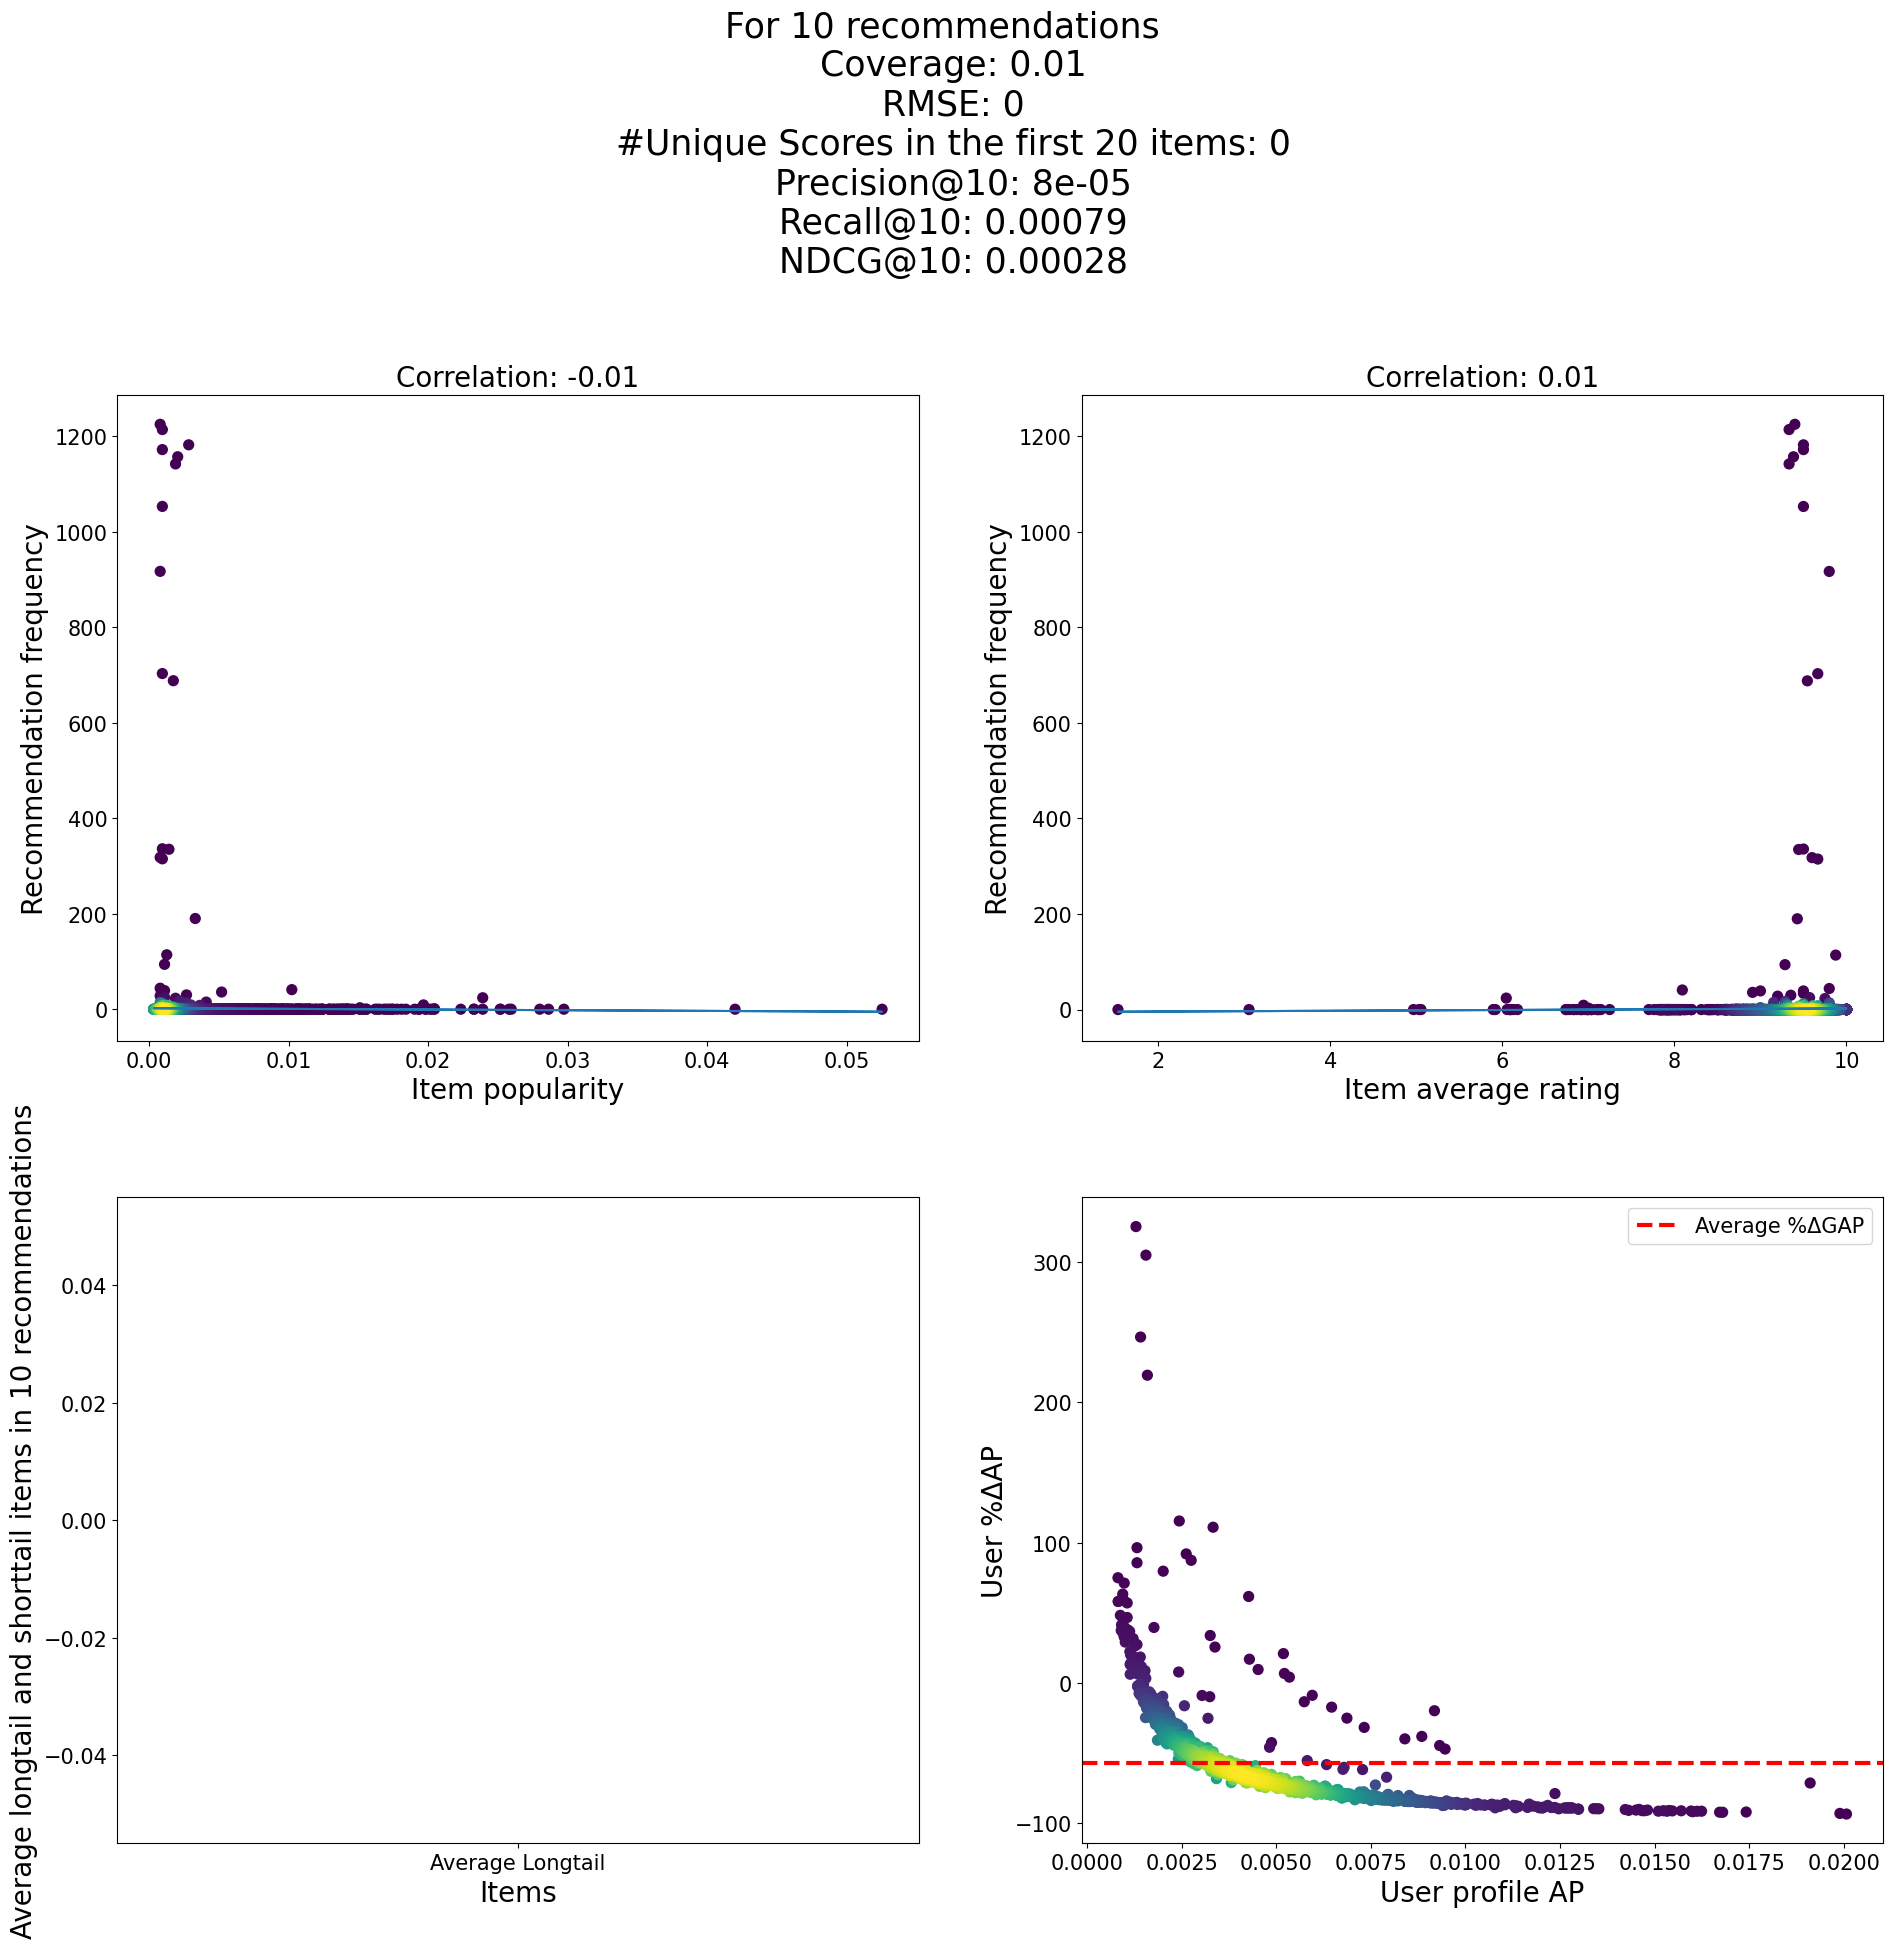

elliot/results/popularity_bad5/recs/
elliot/results/popularity_bad5/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-32_imlp=64-32_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 11:58:13.068674: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:58:13.068716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:58:13.247547: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 11:58:13.247583: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 11:58:13.483173: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 3213
2.5279307631785994


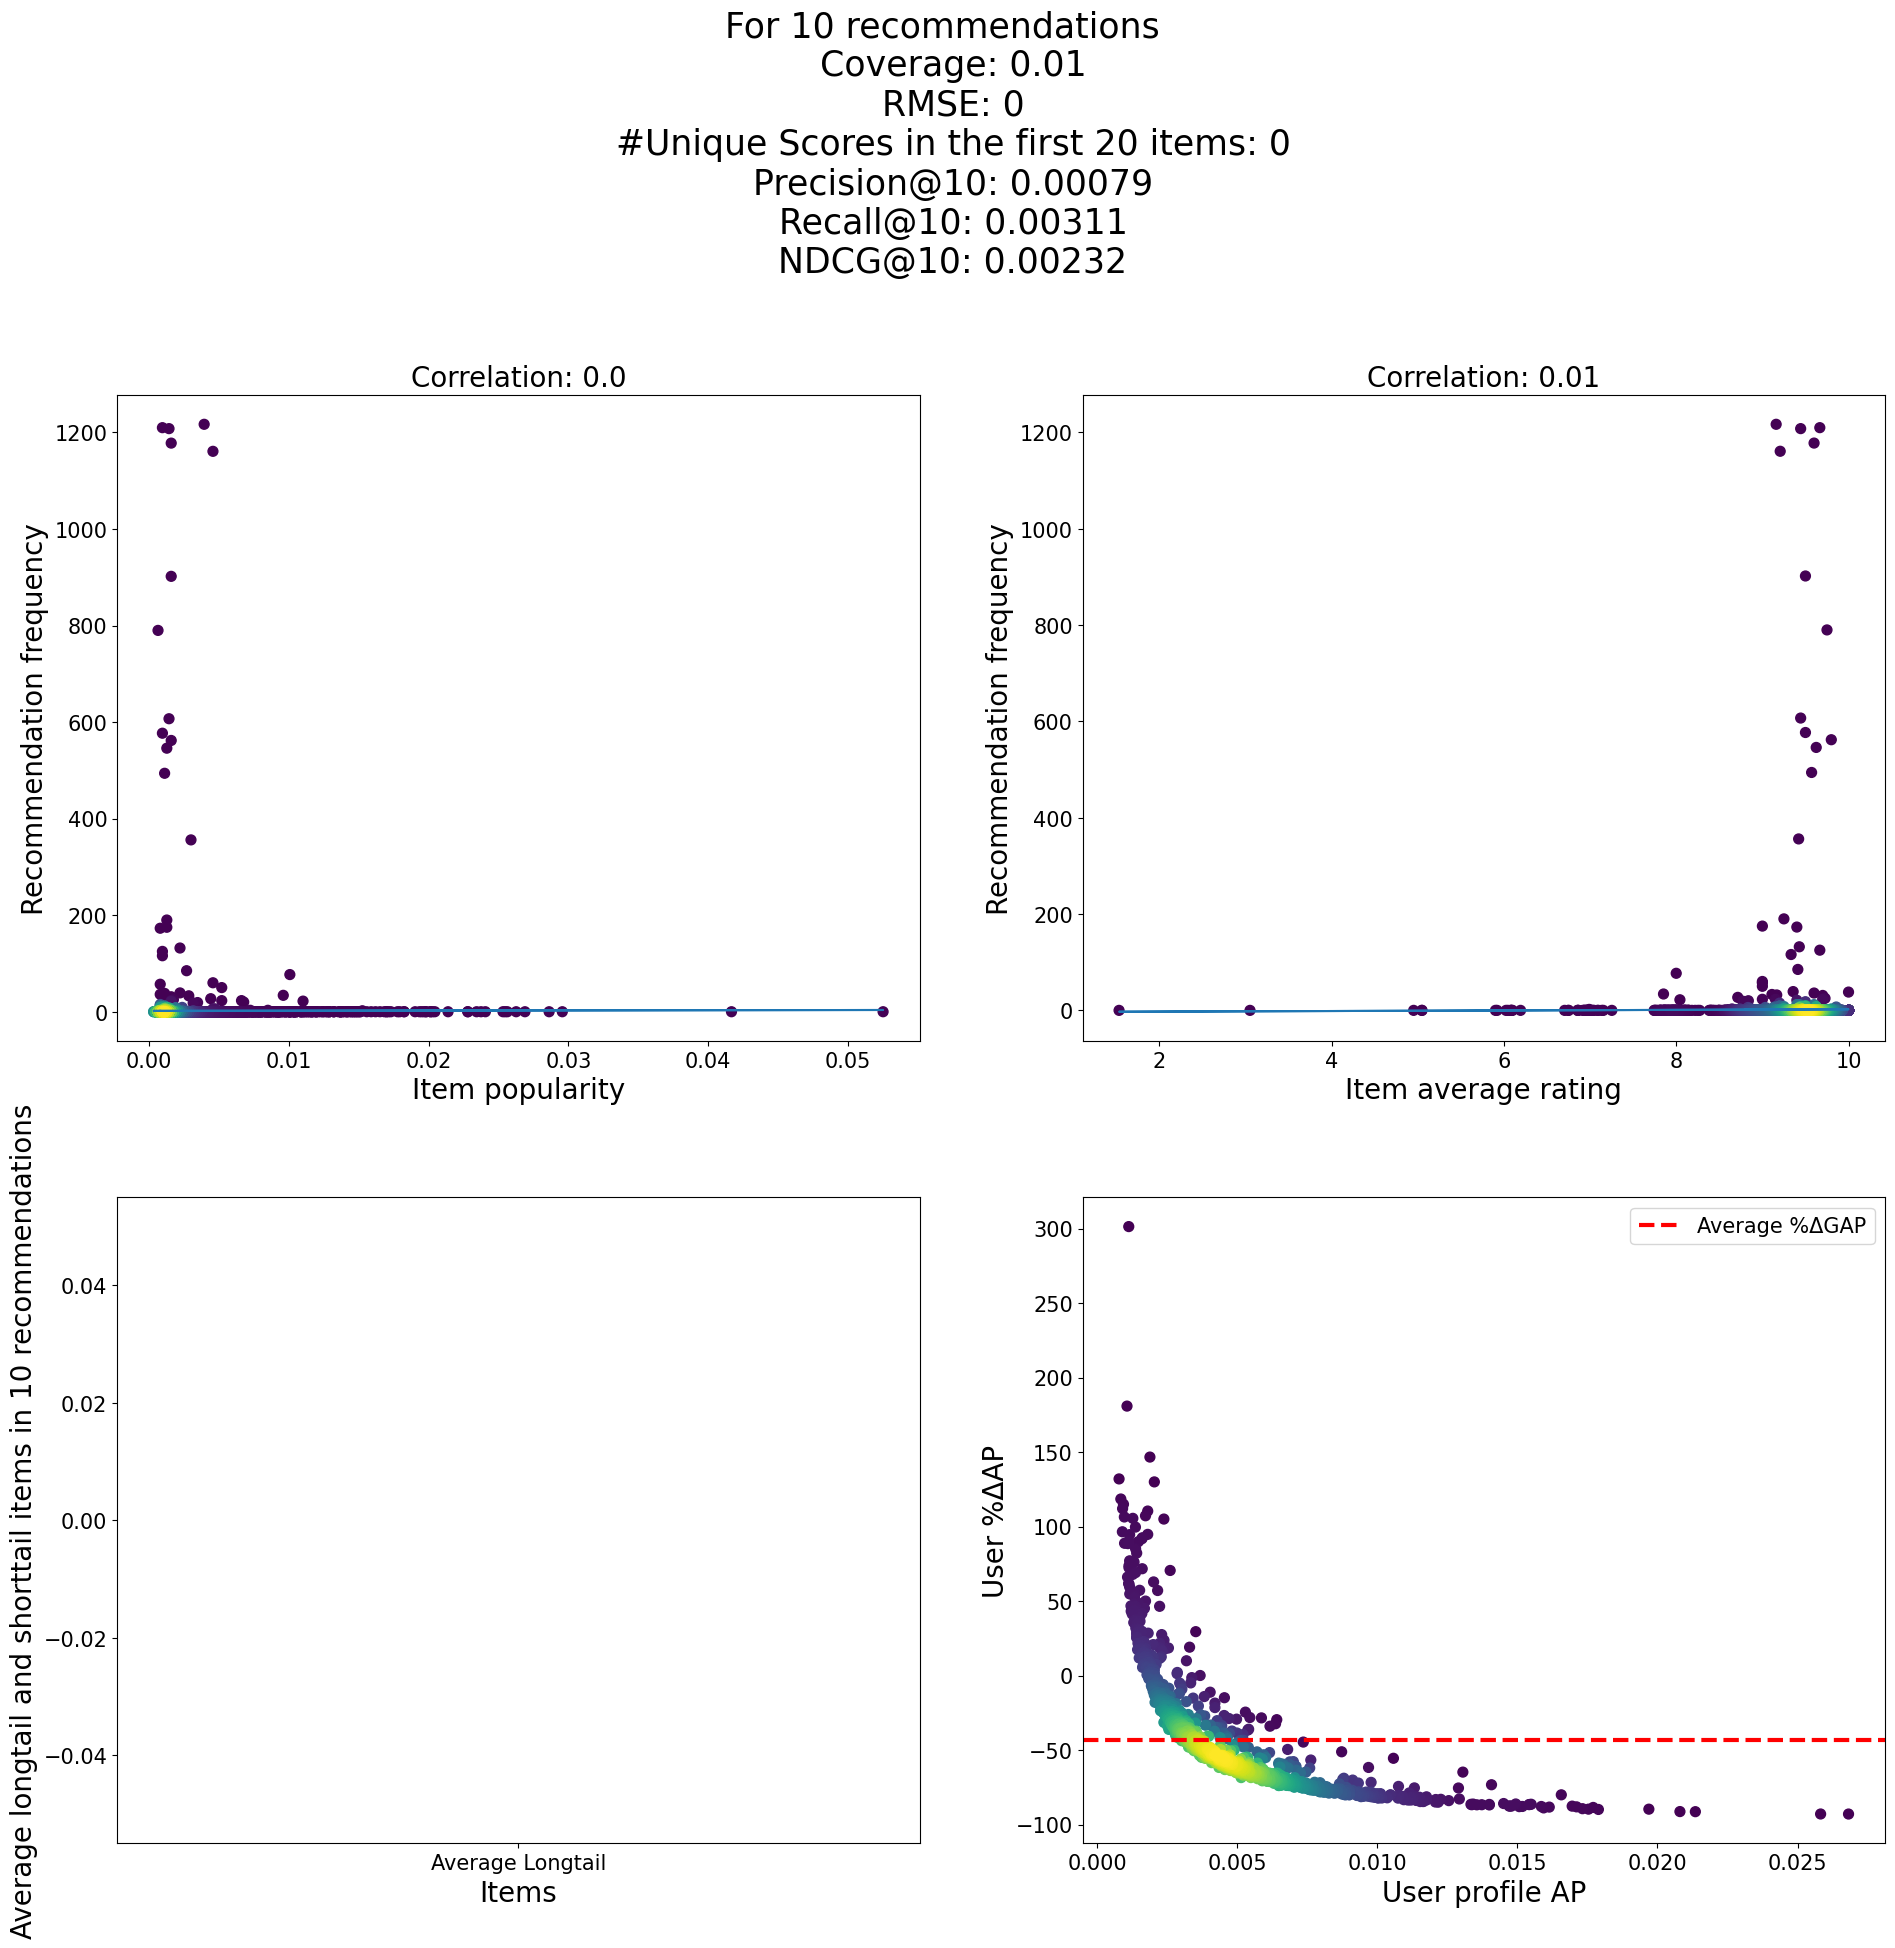

In [30]:
pg_metrics = []
for i in range(5):
    current_location = location+str(i+1)+'/recs/'
    print(current_location)
    
    result_file = current_location+'DMF_seed=42_e=10_bs='+str(batch_size)+'_lr=0$0001_umlp='+str(mlp)+'_imlp='+str(mlp)+'_negratio=5_reg=0$001_sim=cosine_it=10.tsv' # last iteration
    print(result_file)
    # sett = sets[i]

    train_df = pd.read_csv('elliot/data/popularity_bad'+str(i+1)+'/'+data_strategies[0]+'_fold_'+str(i+1)+'_train.csv')
    test_df = pd.read_csv('elliot/data/popularity_bad'+str(i+1)+'/'+data_strategies[0]+'_fold_'+str(i+1)+'_test.csv')

    test_users = test_df.user.unique()
    result_df = pd.read_csv(result_file, sep='\t', header=None)
    result_df.columns = ['user','item','rating']
    test_result = result_df[result_df.user.isin(test_users)].reset_index(drop=True)
    
    filtered_test_result = test_result.copy()
    recs_grouped = filtered_test_result.groupby([user_col])[item_col].apply(list)
    pop_bias= modelling_mf.calculate_pop_bias_per_item(all_items, item_col, user_col, predict_col, train_df, recs=filtered_test_result)
    GAP_vs_GAP = modelling_mf.calculate_ave_pop_per_user(test_users, item_col, user_col, pop_bias, train_df, recs_grouped)
    pop_corr = modelling_mf.calculate_pop_correlation(pop_bias)
    precision, recall, ndcg = modelling_mf.calculate_topn_metrics(filtered_test_result,test_df)
    AggDiv = modelling_mf.evaluate_item_coverage(pop_bias["recommendation"].values)
    ARP, ave_PL, ACLT = modelling_mf.calculate_all_pb_metrics(pop_bias, test_users, item_col, user_col, train_df, recs_grouped, filtered_test_result)
    metrics_dict_pg = {"pop_corr":pop_corr, "RMSE":0, 'NDCG':ndcg,"ARP":ARP, "ave_PL": ave_PL, "ACLT": ACLT, "AggDiv": AggDiv}
    pg_metrics.append(metrics_dict_pg)
    pop_biases = [pop_bias]
    modelling_mf.plot_results(pop_biases.copy(), 
             GAP_vs_GAP.copy(), 'DMF',
             0, 
             precision, 
             recall,
             ndcg,
             0,
             0,
             cv=False, 
             n=10, 
             args='fold'+str(i+1), data_strategy=data_strategies[0], save_plot=False)
    

#### Popularity Good

In [31]:
data_strategies = ['popularity_good',
                   ]

In [32]:
location = 'elliot/results/popularity_good'

In [33]:
# possible values for the hyperparameters
mlp_values = ['64-32', '64-64']
batch_size_values = [256, 512]

In [36]:
mlp = mlp_values[1]
batch_size = batch_size_values[1]

In [37]:
ratings = generate_data(strategy = data_strategies[0],
                            copying_dataset = fairbook_ratings,
                            user_perc = 0.2)
all_items=set(ratings.item.unique())

elliot/results/popularity_good1/recs/
elliot/results/popularity_good1/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-64_imlp=64-64_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 12:03:48.251330: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:03:48.251376: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:03:48.447892: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:03:48.447926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:03:48.624252: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 3237
2.544811320754717


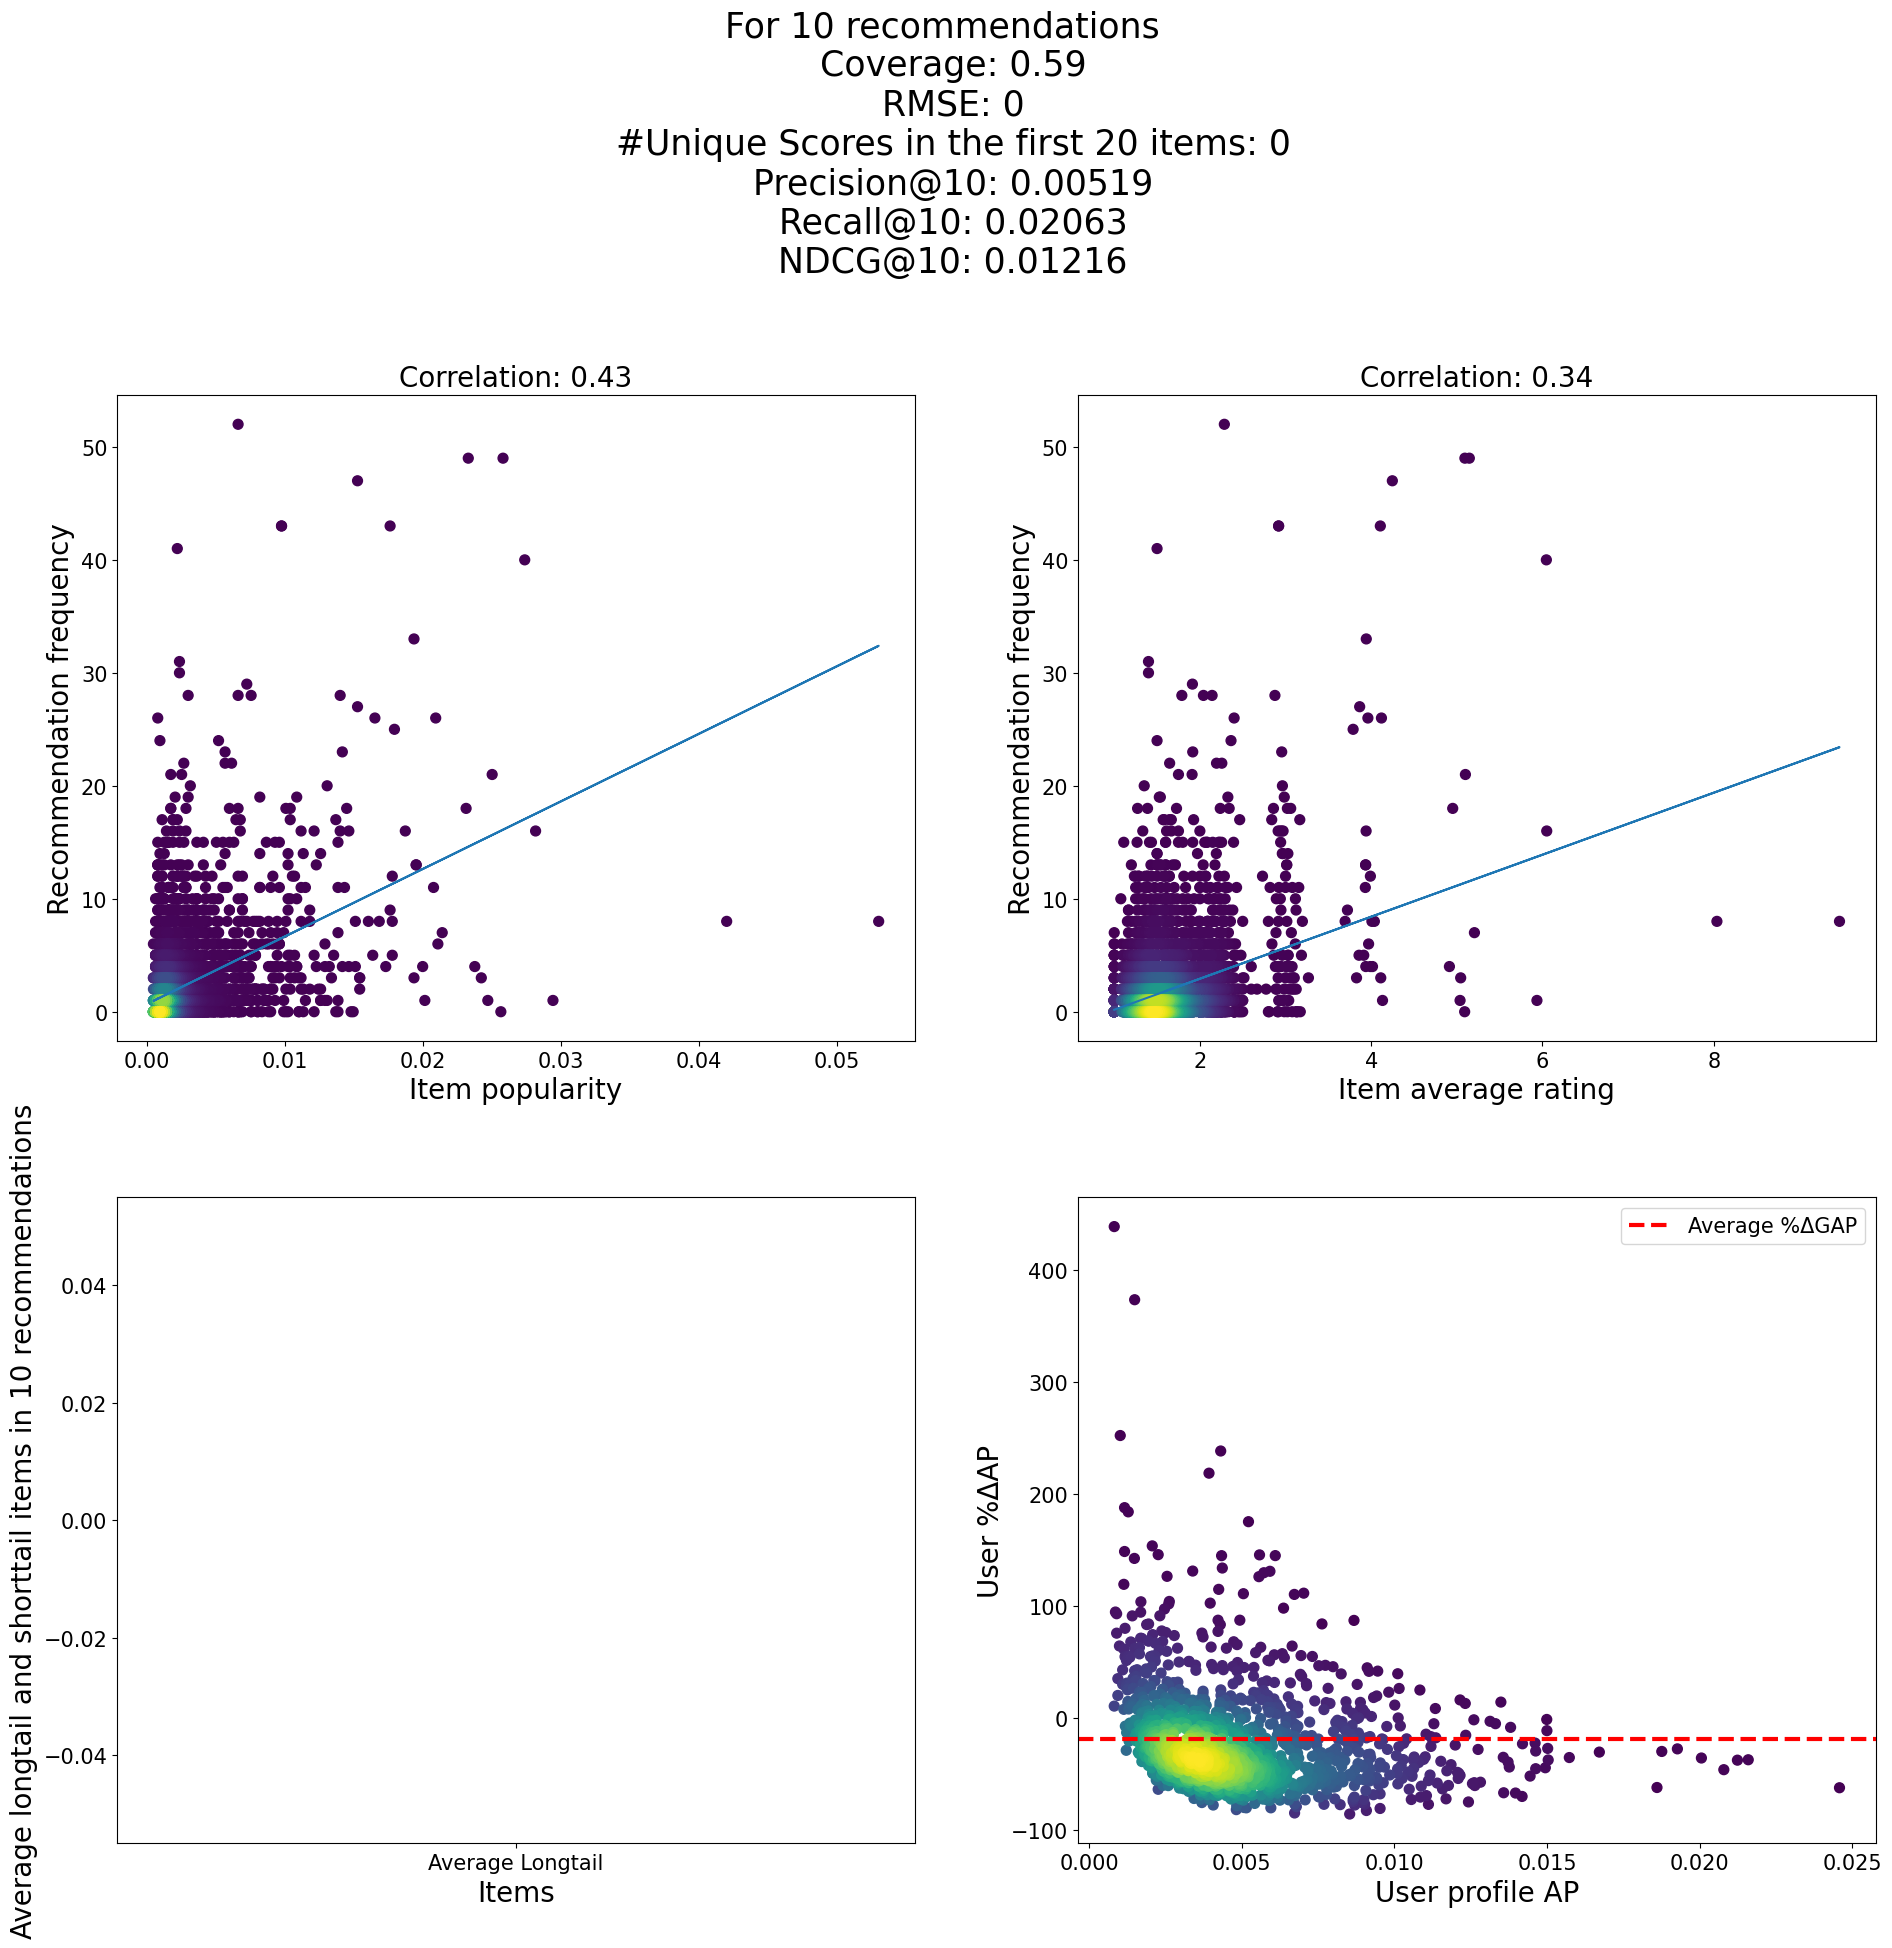

elliot/results/popularity_good2/recs/
elliot/results/popularity_good2/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-64_imlp=64-64_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 12:03:59.532258: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:03:59.532292: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:03:59.729551: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:03:59.729584: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:03:59.964858: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 2746
2.158805031446541


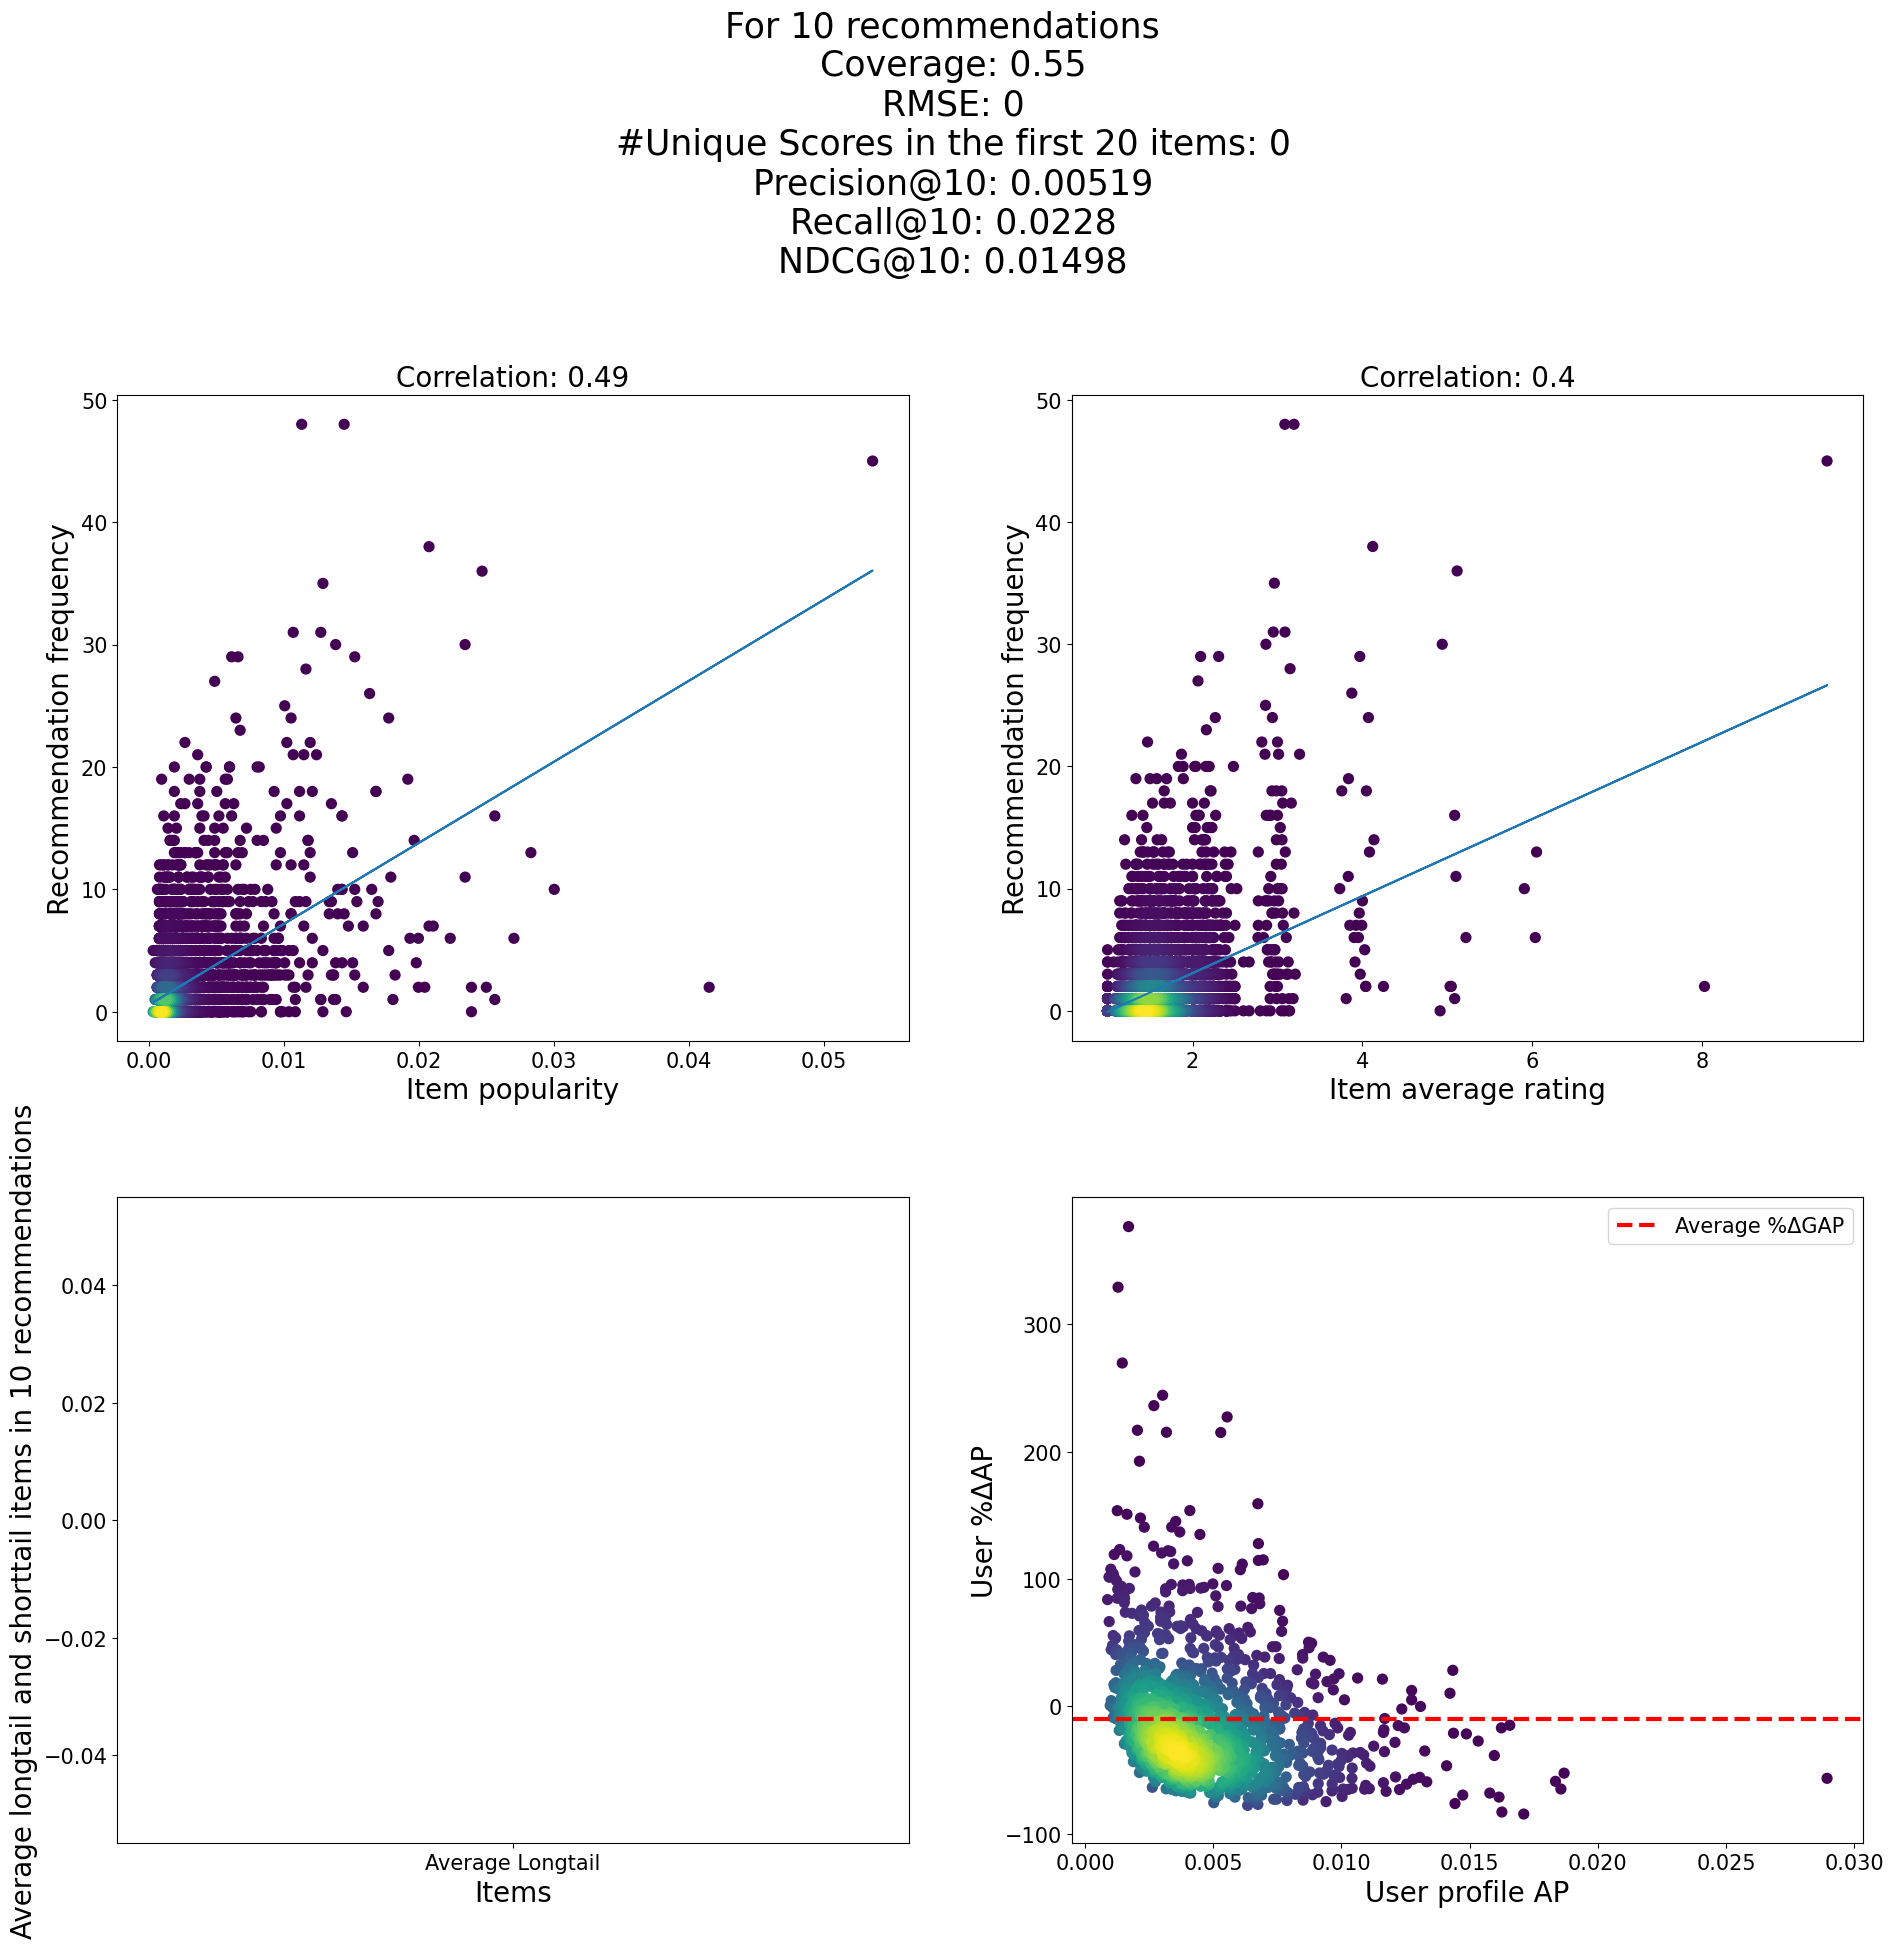

elliot/results/popularity_good3/recs/
elliot/results/popularity_good3/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-64_imlp=64-64_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 12:04:10.897081: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:04:10.897136: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:04:11.075318: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:04:11.075359: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:04:11.307975: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 3256
2.559748427672956


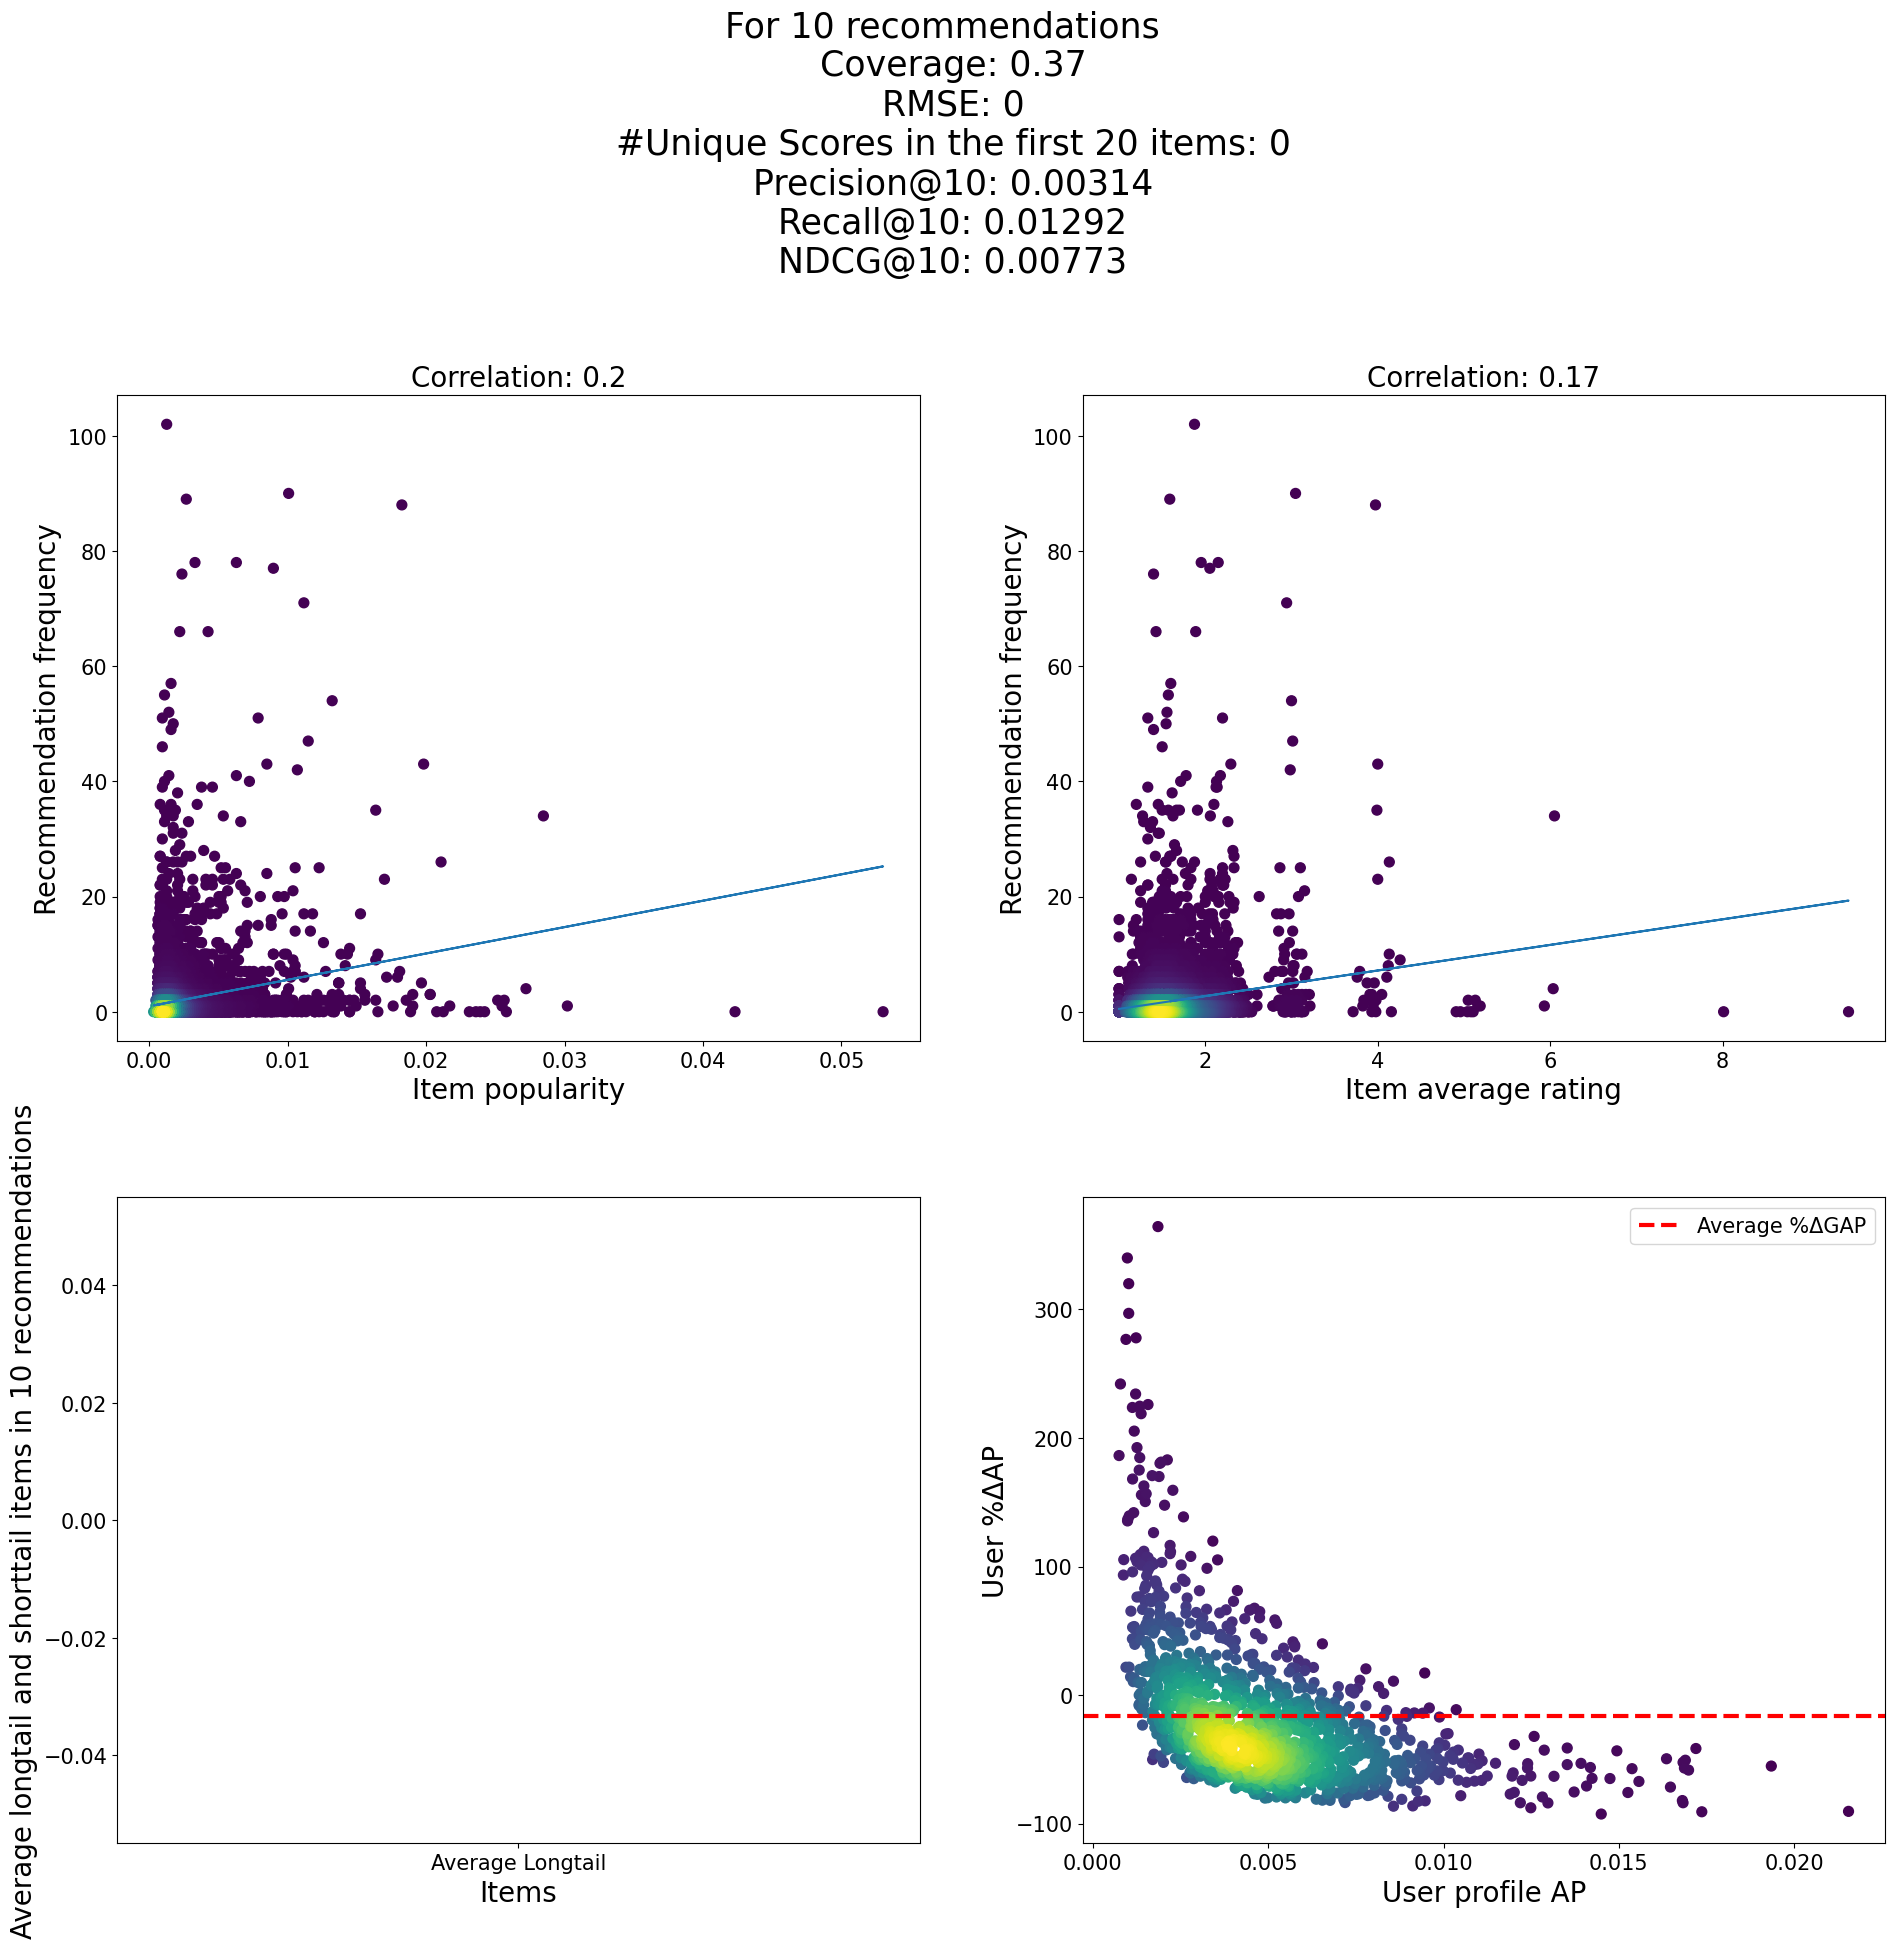

elliot/results/popularity_good4/recs/
elliot/results/popularity_good4/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-64_imlp=64-64_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 12:04:22.050497: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:04:22.050531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:04:22.290387: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:04:22.290430: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:04:22.477456: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 2741
2.1565696302124313


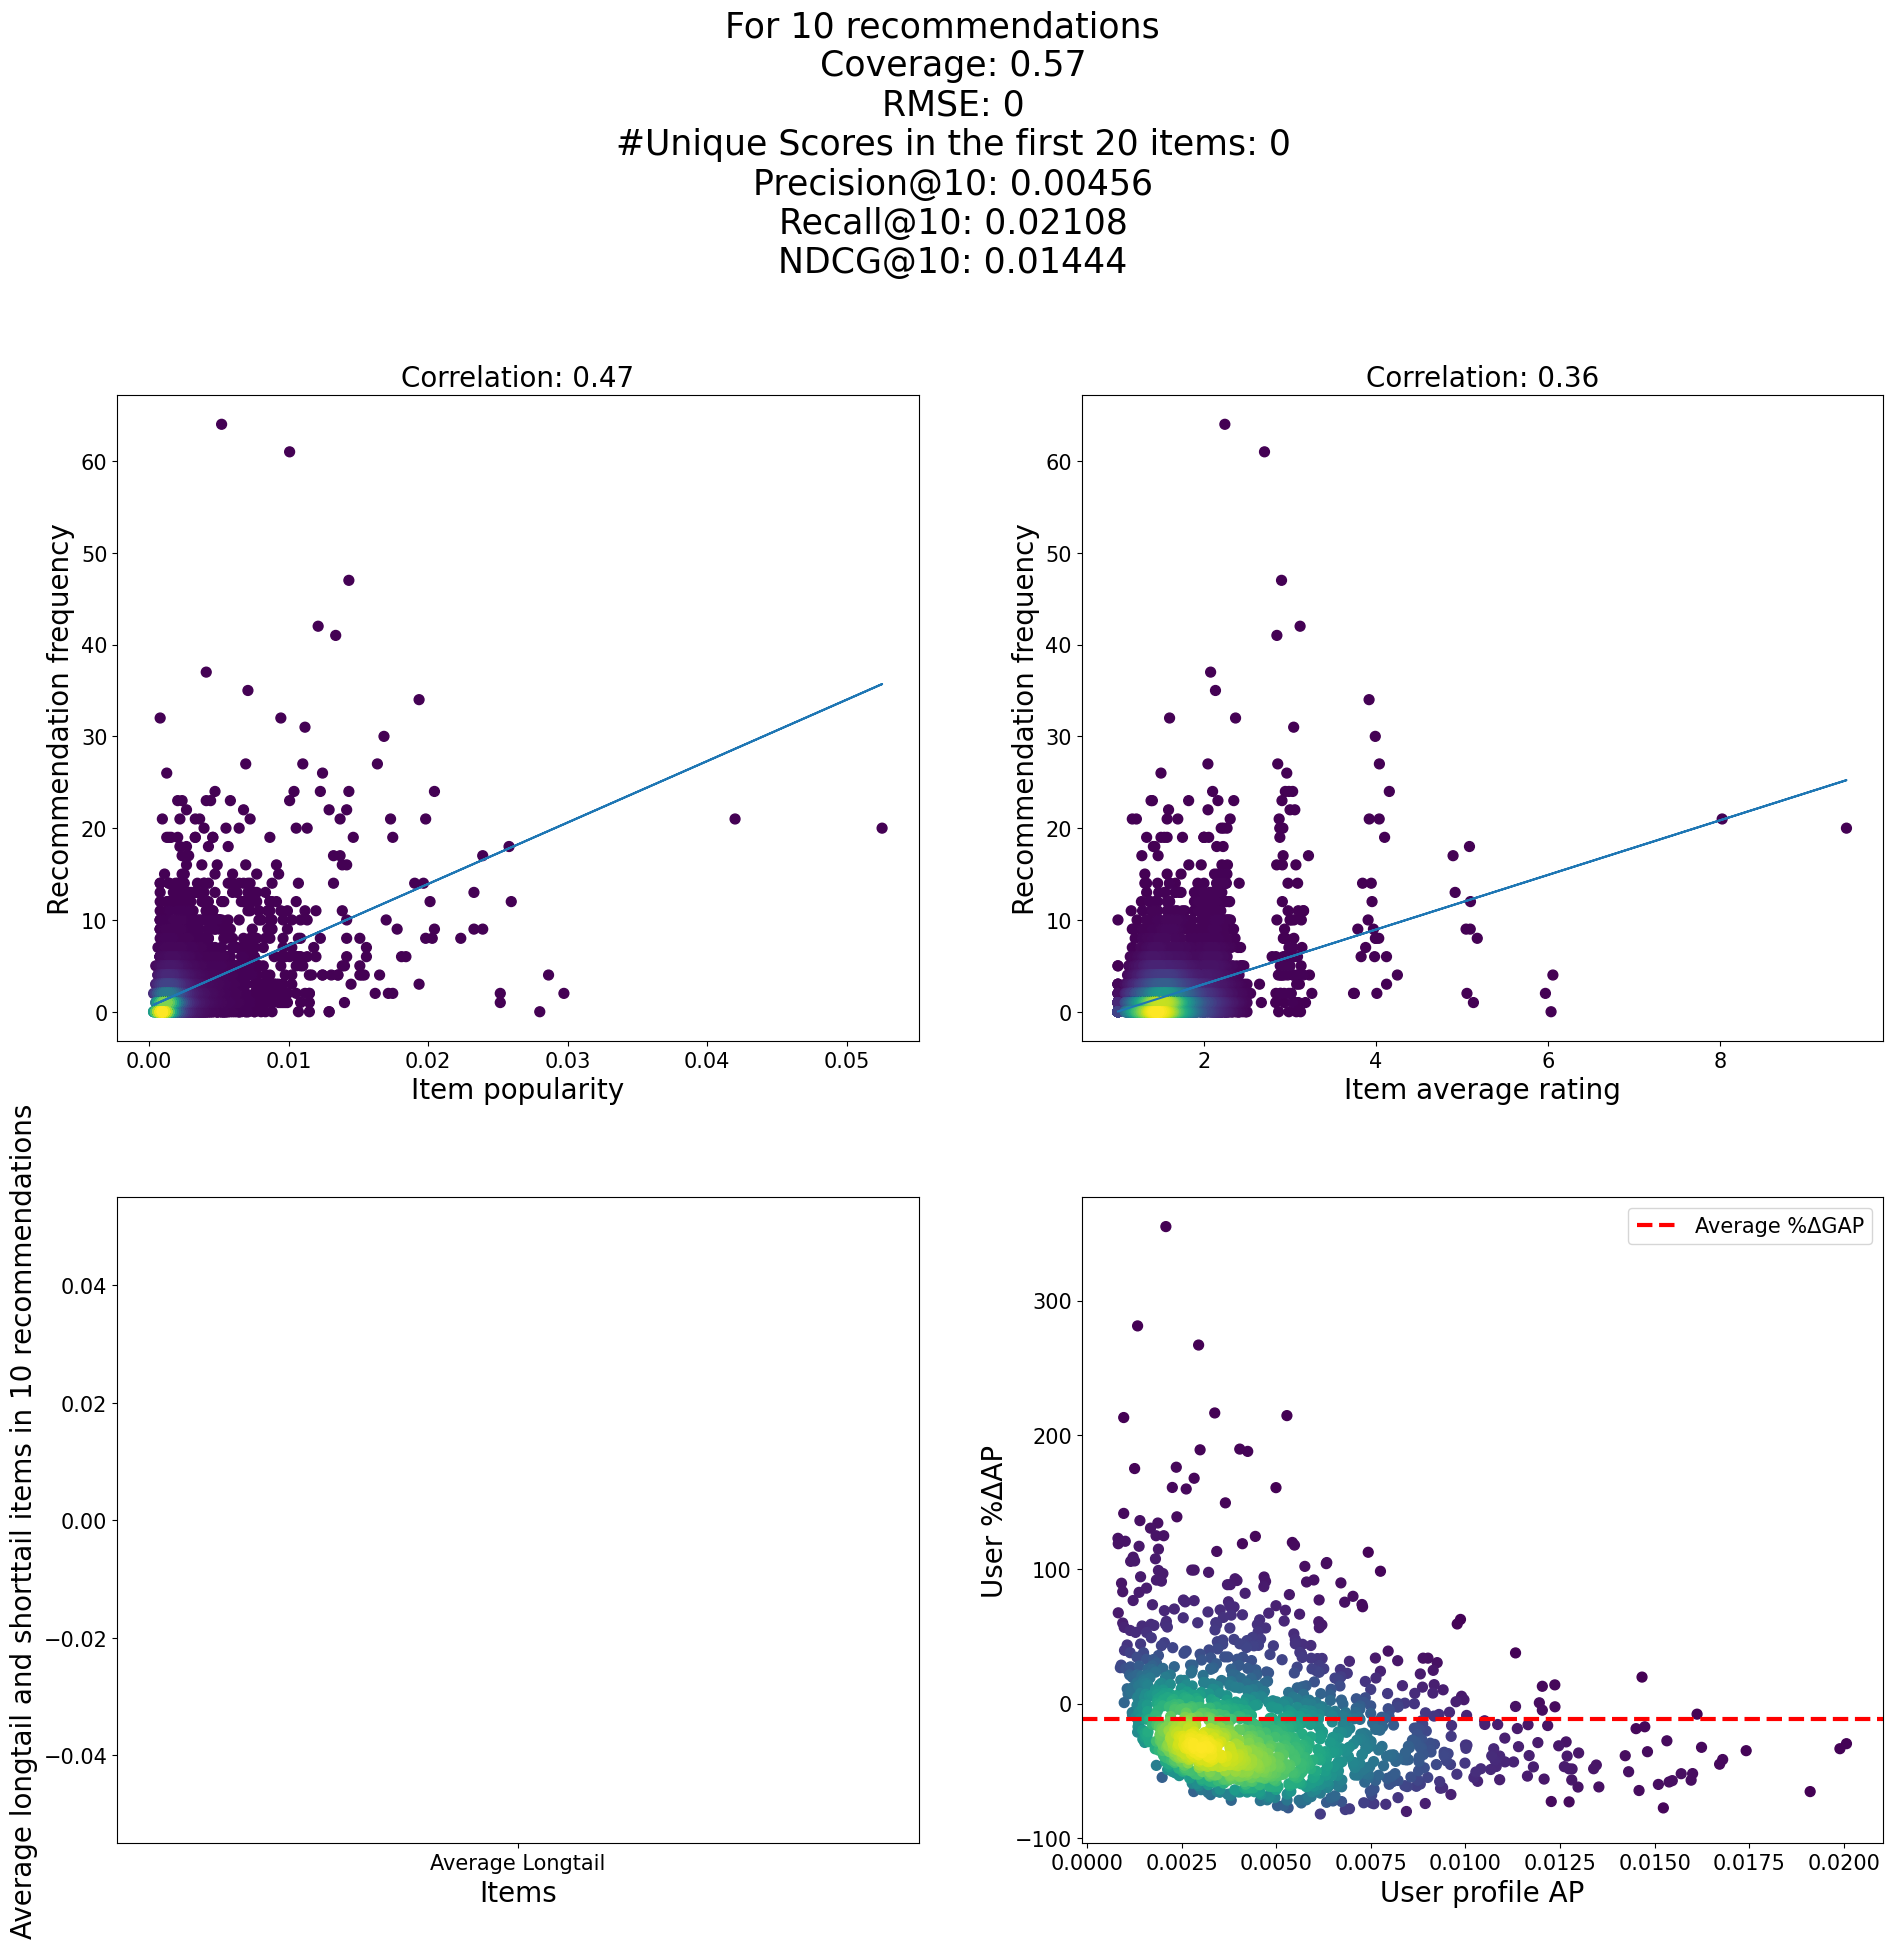

elliot/results/popularity_good5/recs/
elliot/results/popularity_good5/recs/DMF_seed=42_e=10_bs=512_lr=0$0001_umlp=64-64_imlp=64-64_negratio=5_reg=0$001_sim=cosine_it=10.tsv


2024-03-18 12:04:33.099645: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:04:33.099687: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:04:33.290598: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2024-03-18 12:04:33.290627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-18 12:04:33.540759: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or dire

nr of longtail 2825
2.222659323367427


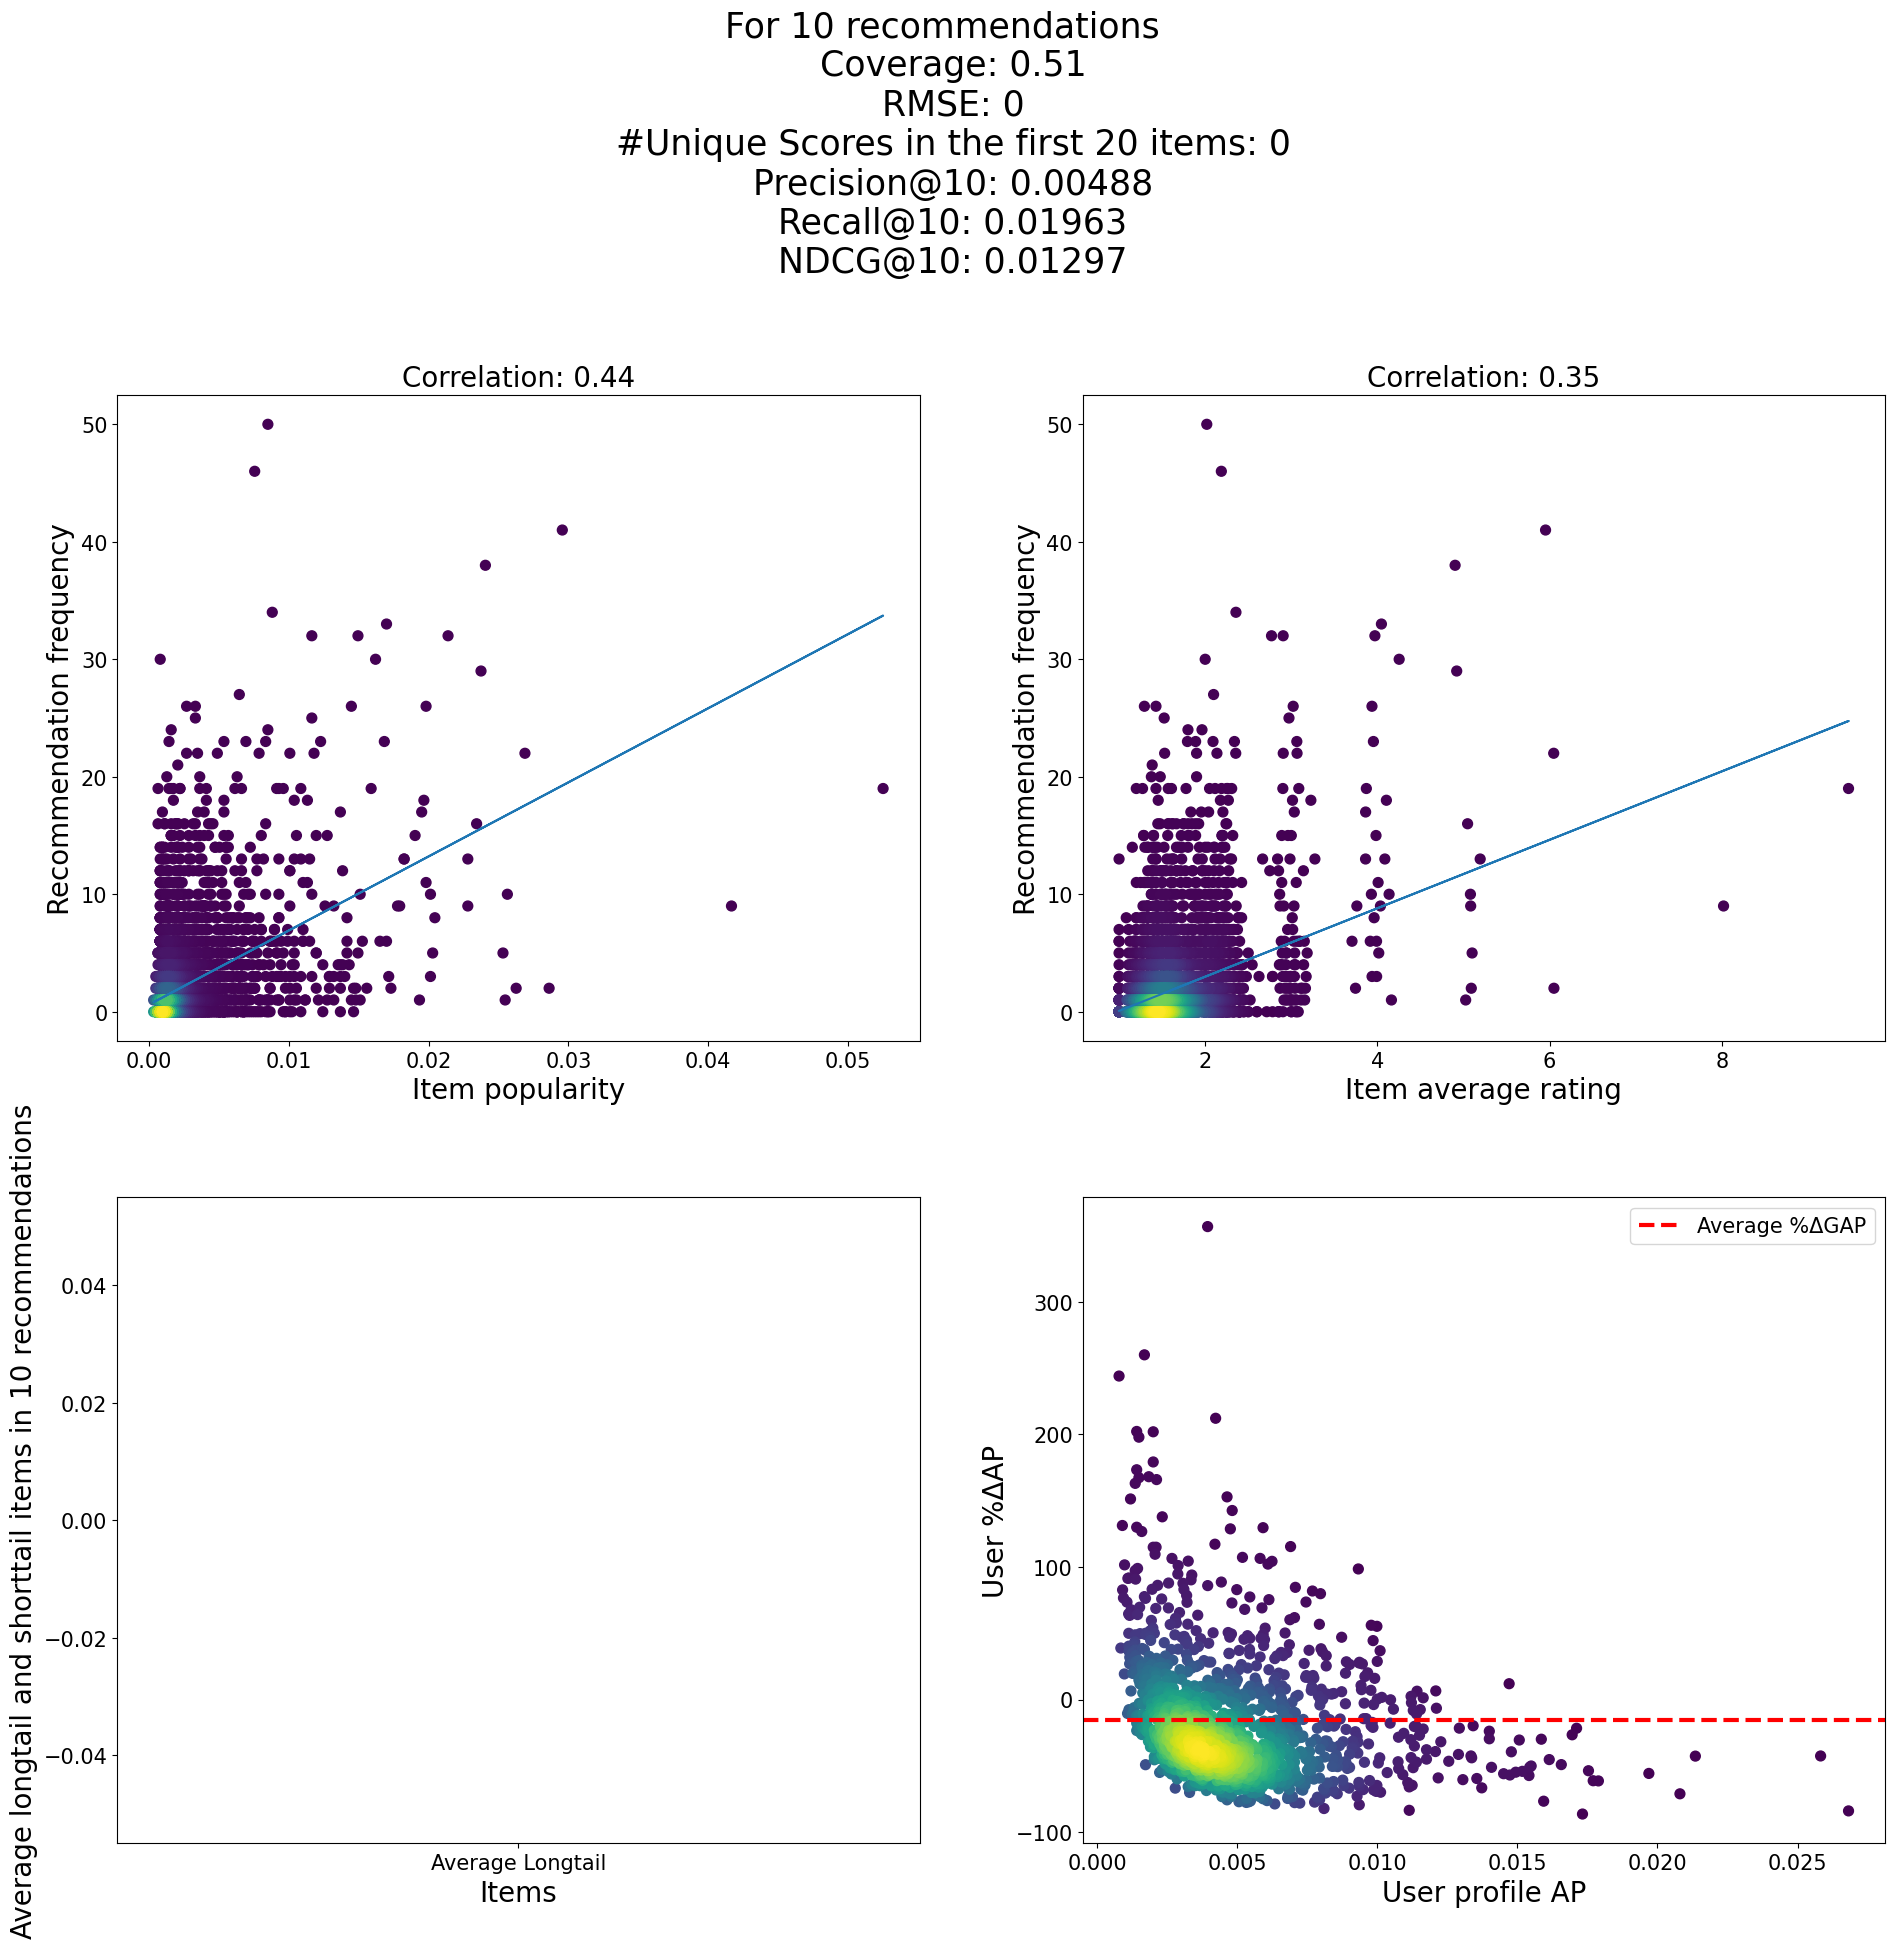

In [38]:
pg_metrics = []
for i in range(5):
    current_location = location+str(i+1)+'/recs/'
    print(current_location)
    
    result_file = current_location+'DMF_seed=42_e=10_bs='+str(batch_size)+'_lr=0$0001_umlp='+str(mlp)+'_imlp='+str(mlp)+'_negratio=5_reg=0$001_sim=cosine_it=10.tsv' # last iteration
    print(result_file)
    # sett = sets[i]

    train_df = pd.read_csv('elliot/data/popularity_good'+str(i+1)+'/'+data_strategies[0]+'_fold_'+str(i+1)+'_train.csv')
    test_df = pd.read_csv('elliot/data/popularity_good'+str(i+1)+'/'+data_strategies[0]+'_fold_'+str(i+1)+'_test.csv')

    test_users = test_df.user.unique()
    result_df = pd.read_csv(result_file, sep='\t', header=None)
    result_df.columns = ['user','item','rating']
    test_result = result_df[result_df.user.isin(test_users)].reset_index(drop=True)
    
    filtered_test_result = test_result.copy()
    recs_grouped = filtered_test_result.groupby([user_col])[item_col].apply(list)
    pop_bias= modelling_mf.calculate_pop_bias_per_item(all_items, item_col, user_col, predict_col, train_df, recs=filtered_test_result)
    GAP_vs_GAP = modelling_mf.calculate_ave_pop_per_user(test_users, item_col, user_col, pop_bias, train_df, recs_grouped)
    pop_corr = modelling_mf.calculate_pop_correlation(pop_bias)
    precision, recall, ndcg = modelling_mf.calculate_topn_metrics(filtered_test_result,test_df)
    AggDiv = modelling_mf.evaluate_item_coverage(pop_bias["recommendation"].values)
    ARP, ave_PL, ACLT = modelling_mf.calculate_all_pb_metrics(pop_bias, test_users, item_col, user_col, train_df, recs_grouped, filtered_test_result)
    metrics_dict_pg = {"pop_corr":pop_corr, "RMSE":0, 'NDCG':ndcg,"ARP":ARP, "ave_PL": ave_PL, "ACLT": ACLT, "AggDiv": AggDiv}
    pg_metrics.append(metrics_dict_pg)
    pop_biases = [pop_bias]
    modelling_mf.plot_results(pop_biases.copy(), 
             GAP_vs_GAP.copy(), 'DMF',
             0, 
             precision, 
             recall,
             ndcg,
             0,
             0,
             cv=False, 
             n=10, 
             args='fold'+str(i+1), data_strategy=data_strategies[0], save_plot=False)
    